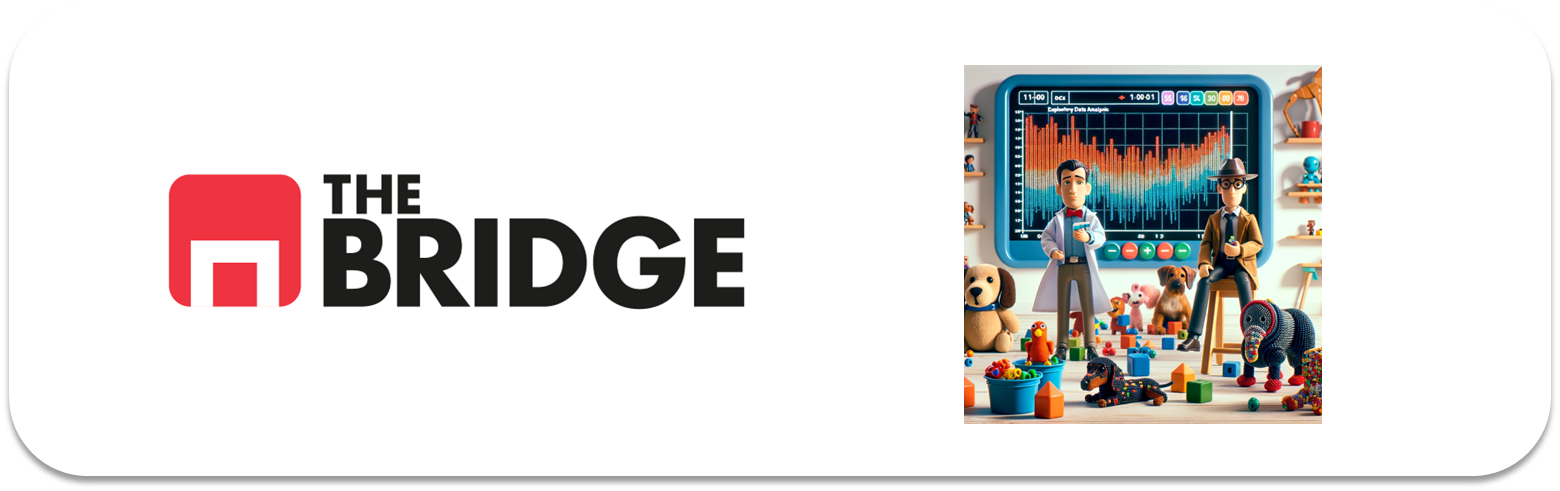

* Objetivo: Si tengo objetivo perfecto, si no -> buscarlo7
* LIMPIAR
* Tabla de variables: definiciones, tipificar, priorizar 
* Análisis Univariante: Análisis visual y numerico
    Categoricas: Moda, Frecuencias, Absolutas, Relativas
    Numericas: Tendencia Central (mediana, media), rangos, posción (percentiles-cuartiles, IQR), dispersion, distribución (histograma, densidad probabilidad)
* Analisis bivariante:  Análisis visual y numérico
    * Categorica-Categórica -> Chi-2
    * Categorica-Numerica -> Categórica es binaria (Prueba U Mann-Whitney/t-student) y si no es binaria (ANOVA)
    * Numerica- Numerica -> Correlación de Pearson (Prueba estadística) 
    NO HAY CORREACION DE PEARSON para categóricas; Binaria: 0,1 -> NO es corrector usar Pearson.
    Ideas, preguntas, cosas extraordinarias
    Tabla de contingencia -> Solo para dos categóricas con cardinalidad controlada
* Analisis 2 o más: A "ojo".Free style
* Te paras: Haces restrospectiva -> lista de verdaderas hipótesis/preguntas/suposiciones/inquietudes
    - NUMEROS
* Respuestas: MENSAJES
    - No hay respuesta en los datos.
    - 12, un número
    - La respuesta puede ser No.

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [2]:
import warnings
warnings.filterwarnings("ignore")

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp

In [6]:
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic.embark_town.mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"

media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?


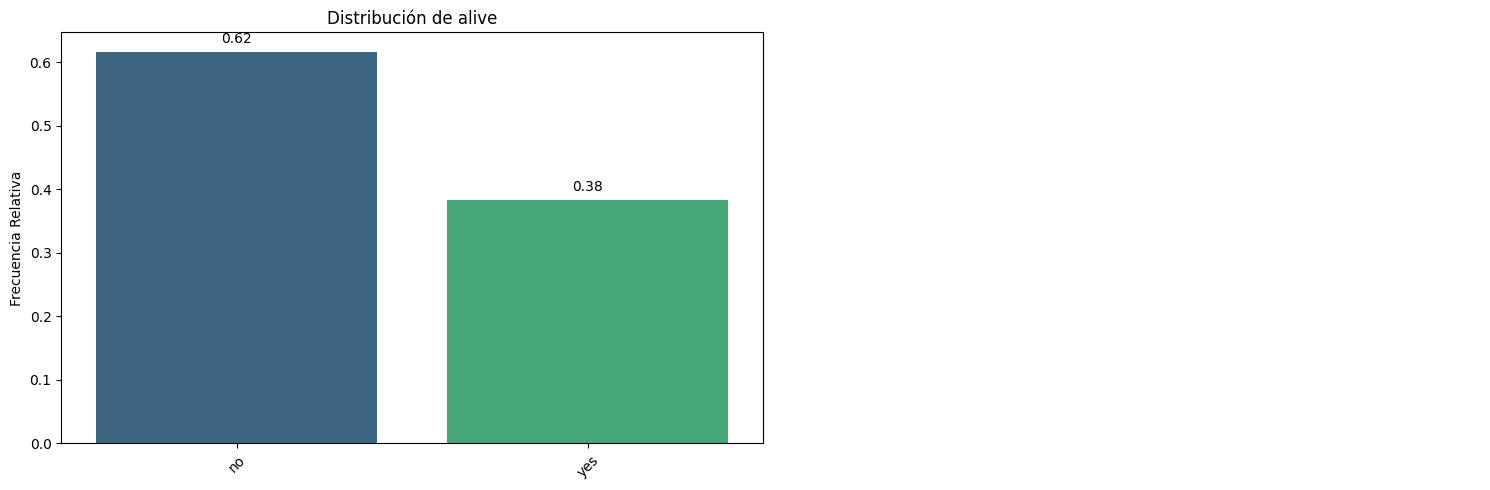

In [9]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

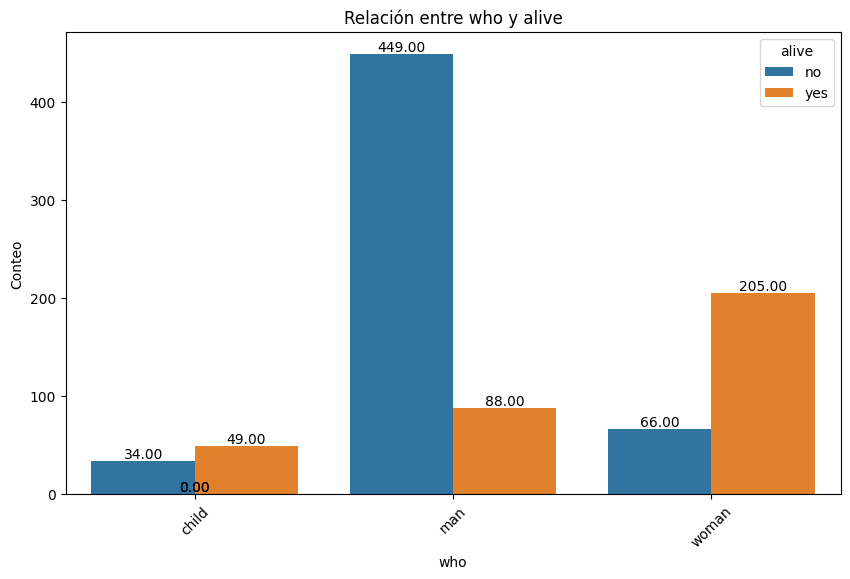

In [10]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

In [11]:
df_titanic.loc[df_titanic.who == "woman"].age.min()

16.0

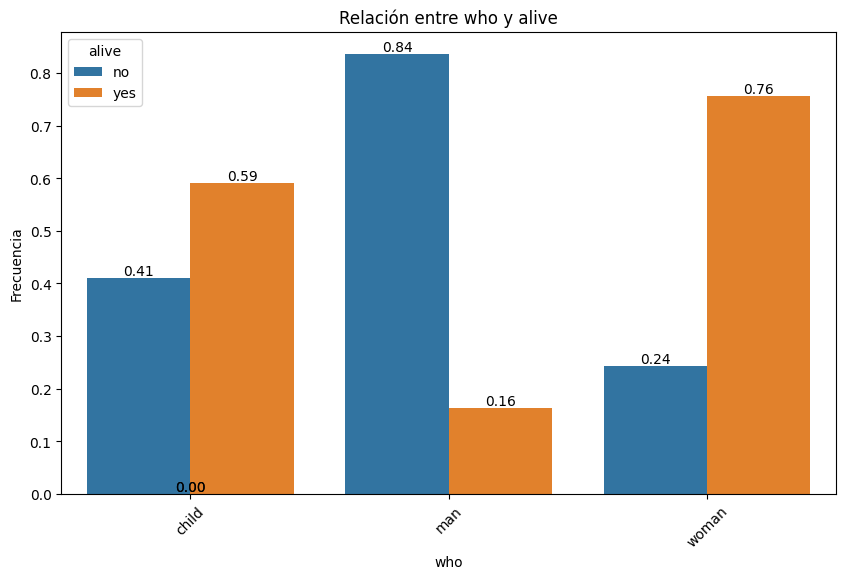

In [12]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq= True, show_values= True)

* *En términos absolutos murieron muchos más hombres que cualquiera de los otros dos grupos*
* *En términos relativos,también la mortalidad fue superior (visualmente muy superior al del resto de grupos, 84% vs 41% en niños y 24% en mujeres). Y además comparado con la media total se ve claramente que está por encima.*

In [13]:
# Para comparar la relación entre grupo de edad y sexo (variable who) y supervivencia, empleamos el test chi2

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


*Claramente podemos rechazar la hipótesis nula de no dependencia y considerar que sí que hay una relación entre el grupo de edad-sexo y la supervivencia estadísticamente significativa. Ser hombre en el titanic fue duro*  
*Pero otro dato interesante y que podríamos explorar en un potencial EDA es el hecho de que el grupo de los niños sufrió una mortalidad más del doble que el de las mujeres... Mujeres y niños primero,... Por ejemplo un multivariante con clase* 

In [14]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


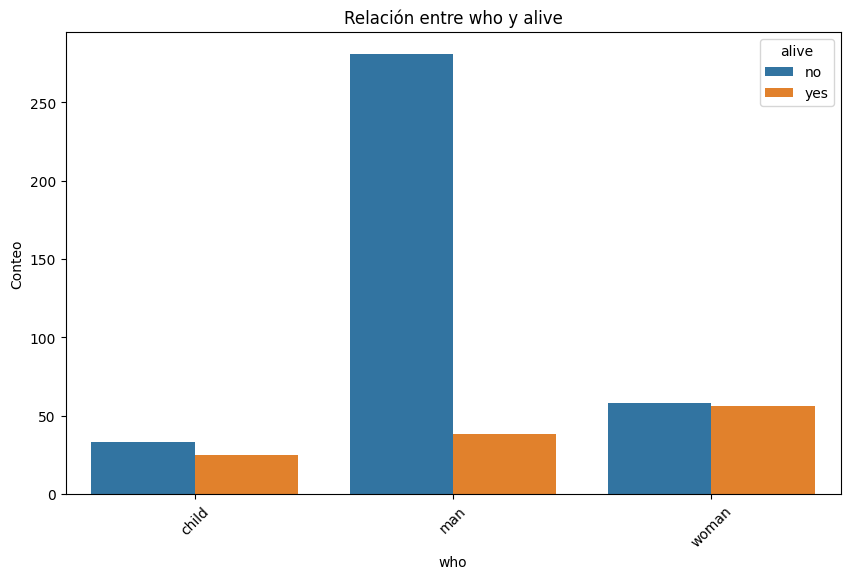

Respuesta First:


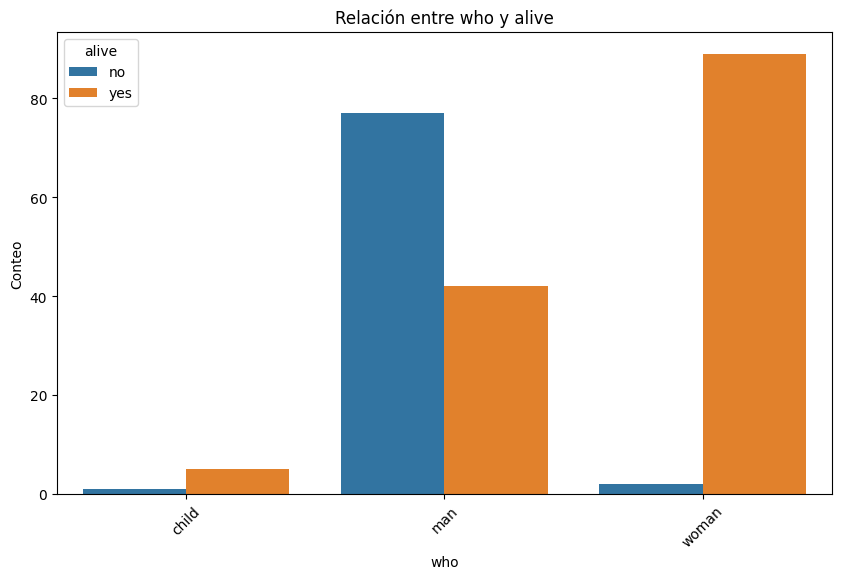

Respuesta Second:


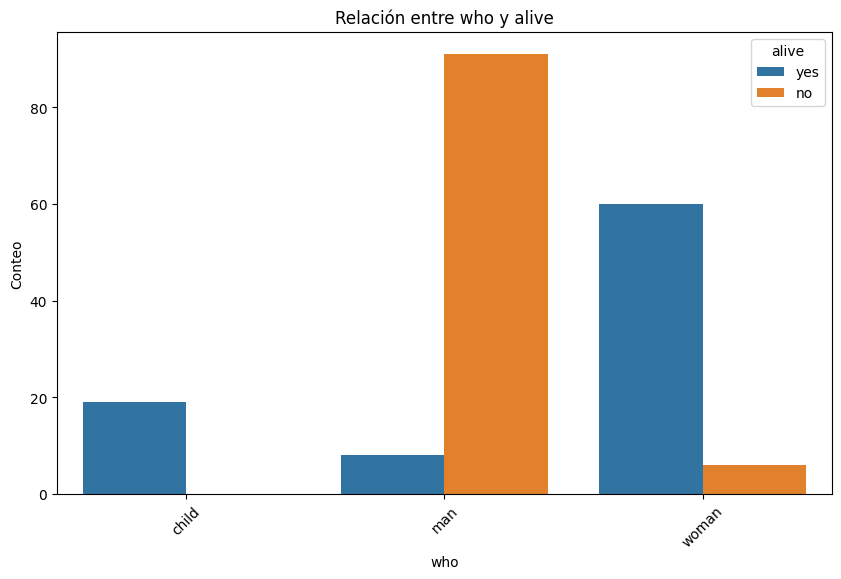

In [15]:
tricategorical_analysis(df_titanic, "class", ["alive","who"])

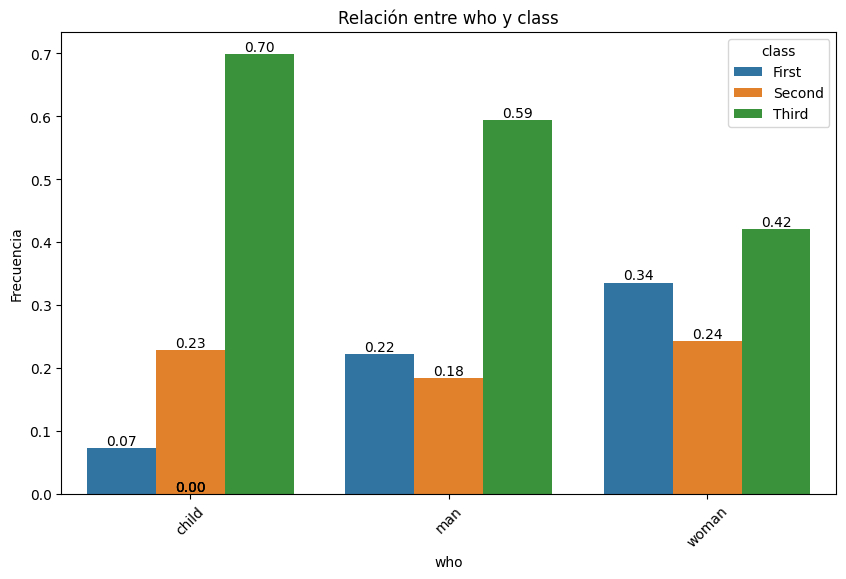

In [16]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= True, show_values= True)

*La explicación de la supervivencia está en la combinación de factores, las mujeres y niños sobrevivieron más en general pero también el factor clase influyó y había muchos más niños en tercera que mujeres en tercera proprocionalmente*


2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?


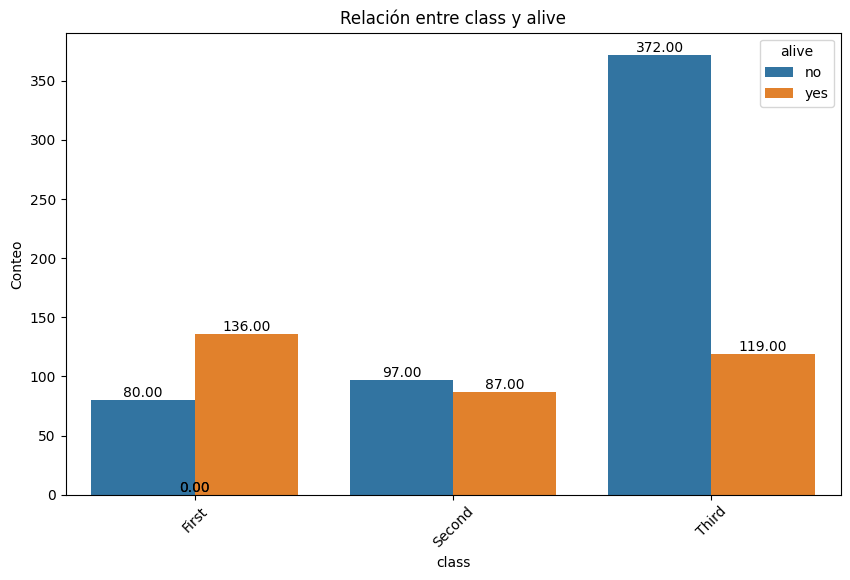

In [17]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

* *En términos absolutos sobrevivieron más pasajeros de primera, luego de tercera y luego de segunda, que no va acorde a la distribución del pasaje. Intuimos que la clase influyó*



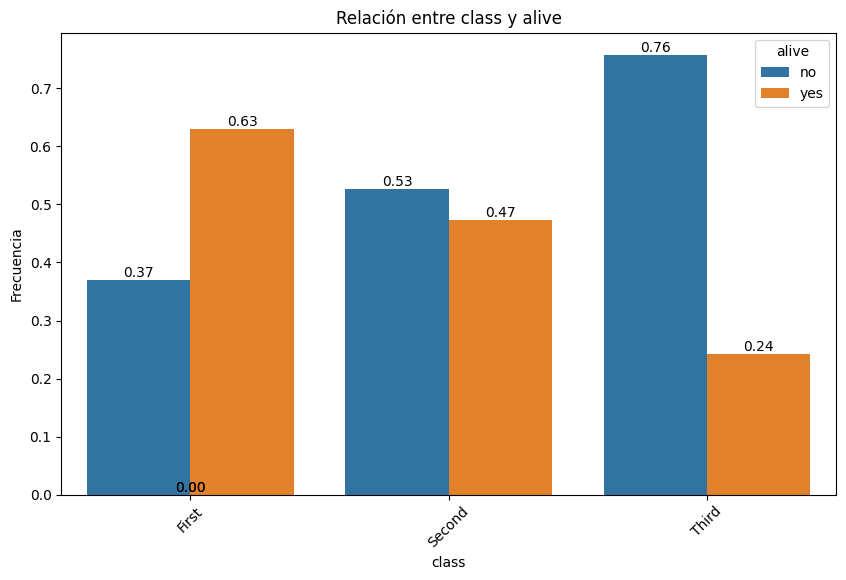

In [18]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq= True, show_values= True)

*En términos relativos, también fue la primera clase la que mayor ratio de supervivencia muestra, aquí además se ve que hay más porcentaje de supervivientes de segunda que de tercera (47% frente a 24%), y que la diferencia en valores absolutos se debe a la diferencia en términos absolutos entre pasajeros que viajaban en segunda y terecera.*

*Para comprobar la relevancia estadística de la que parece una realación clara, volvemos a nuestro test chi-2*

In [19]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


*Como casi erea de esperar, la confianza estadística de la existencia de una relación entre la clase y la supervivencia es muy alta*


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?


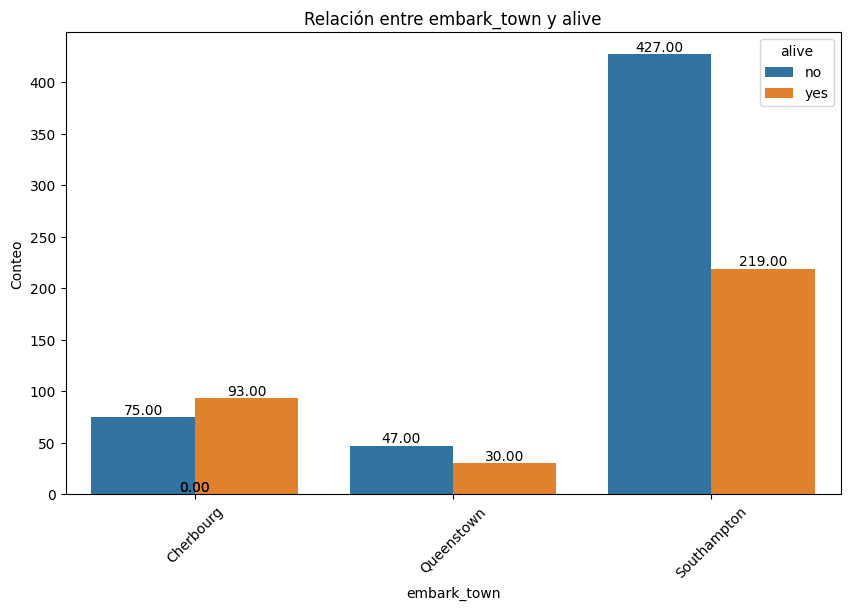

In [20]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

In [21]:
df_titanic.groupby("embark_town", as_index = False)["alive"].value_counts(normalize = False)

,embark_town,alive,count
0,Cherbourg,yes,93
1,Cherbourg,no,75
2,Queenstown,no,47
3,Queenstown,yes,30
4,Southampton,no,427
5,Southampton,yes,219


In [22]:
df_titanic.groupby("embark_town", as_index = False)["alive"].value_counts(normalize = True)

,embark_town,alive,proportion
0,Cherbourg,yes,0.553571
1,Cherbourg,no,0.446429
2,Queenstown,no,0.610390
3,Queenstown,yes,0.389610
4,Southampton,no,0.660991
5,Southampton,yes,0.339009


*Como esperábamos dada la distribución del lugar de embarque de los pasajeros, sobrevivieron más entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos*

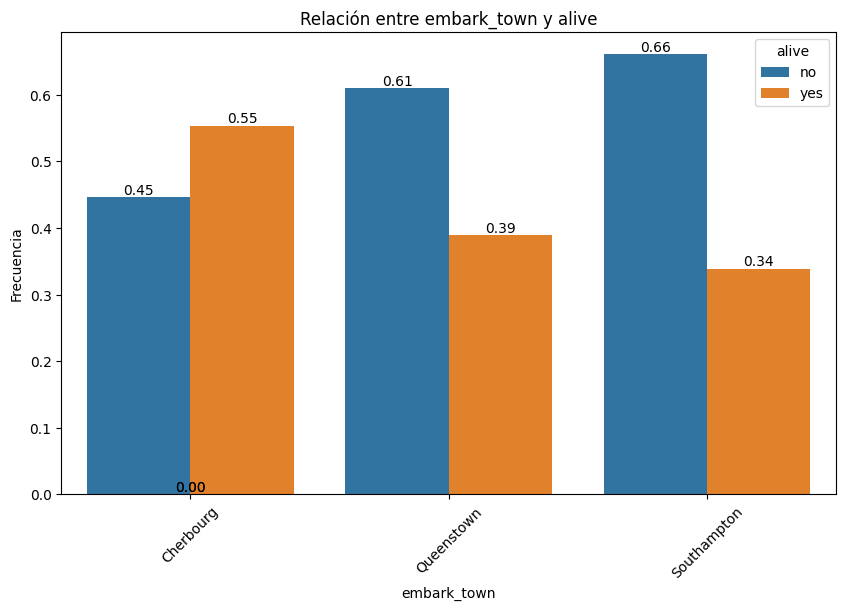

In [23]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq= True)

*El ratio de supervivencia arroja dos datos interesantes y sobre los que profundizar, el ratio de supervivencia en Cherbourg fue mayor que en el resto (55% frente a 39% y 34%) y a su vez el ratio en Queenstown fue mayor que en Southampton. Es decir no sólo hay una diferencia en ratios entre los puertos, sino que además es bastante llamativa. Este es otro de esos datos en los que hay que profundizar y puede ser un buen punto para contar "la historia de los datos del titanic"  [Quizá un rápido vistazo a la distribución de who y de class respecto a los puertos nos lo explique, o quizá sea al reves se salvaron las mujeres y nilos de Cherbourg por ser de allí]*

*Hacemos el test chi-2, para comprobar la confianza estadística:*

In [24]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


*El test nos dice que existe esa relación, somos nosotros los que tenemos que ver si la relación se debe a las propiedades del puerto en sí mismo o está basada en otros factores, como sería que la distribución de pasajeros no es la misma para los puertos y es mayor en las dos variables que ya hemos visto para Cherbourg...*

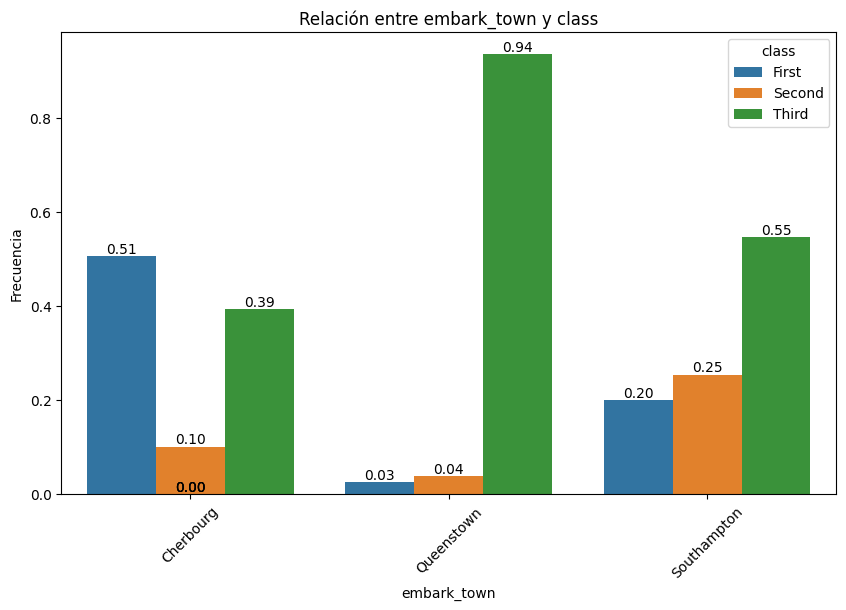

In [25]:
plot_categorical_relationship_fin(df_titanic, "embark_town","class", relative_freq= True, show_values= True)

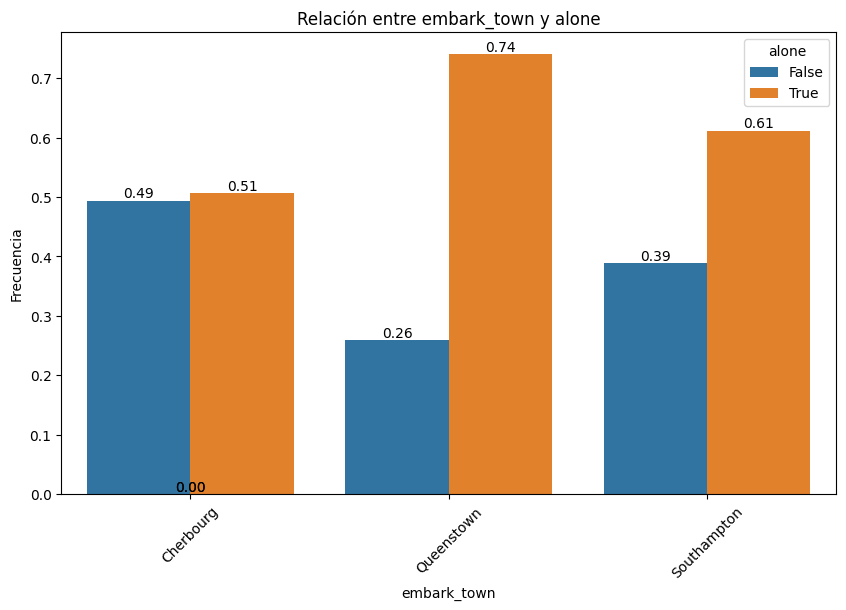

In [26]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alone", relative_freq= True, show_values= True)

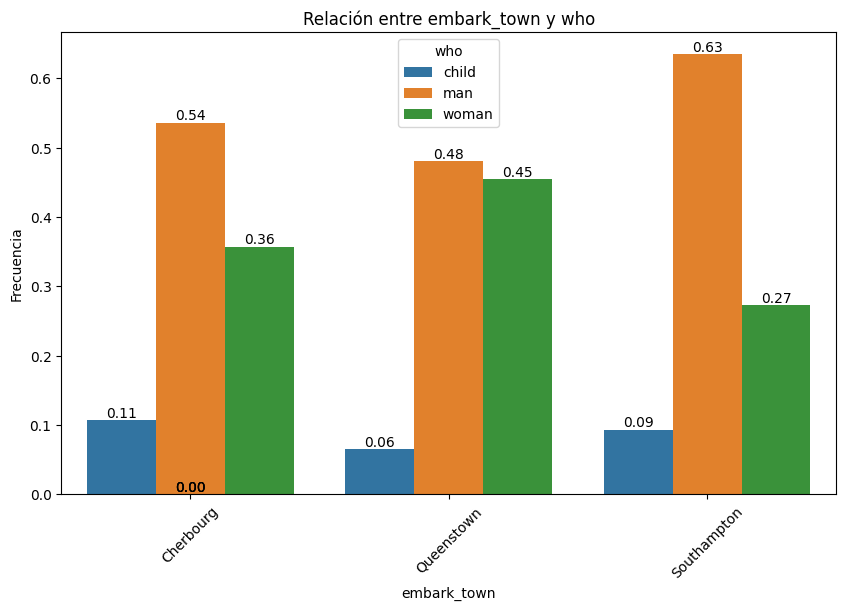

In [27]:
plot_categorical_relationship_fin(df_titanic, "embark_town","who", relative_freq= True, show_values= True)

*Viendo esas dos gráficas ànteriores parece explicarse todo, en Cherbourg la proporción de pasajeros de primera es mayor bastante mayor que en los otros dos puertos. Y la diferencia entre los ratios de Queenstown y de Southampton podría explicarse por el ratio de mujeres que embarcaron en una y otra ciudad (mayor en Queenstown significativamente que en Southampton). Yo diría que más que magia en el origen, el ser mujer y la clase influye mucho como para enmascarar esta relación. ¿Qué deberíamos hacer para hacerla desaparecer matemáticamente?*

*Fijamos los valores who y class y vemos si existe relación entre embark_town y alive, si realmente no hay relación entre ellos salvo la debida a la clase del pasaje y al tipo de pasajero saldrá que son independientes para cada combinación*

*Empezamos con Hombres y vamos probando para cada combinación hombre-clase, cómo es la dependencia entre embark_town y alive*

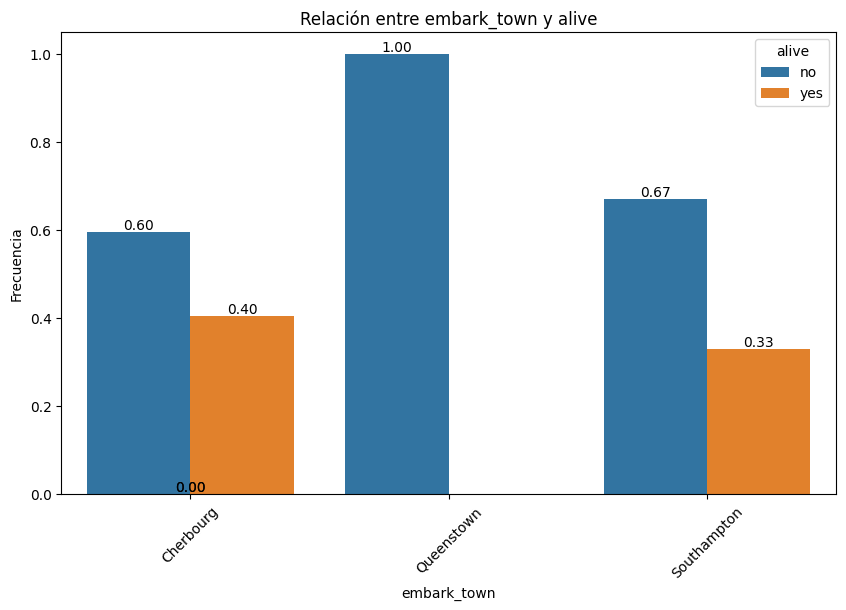

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


In [28]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Salvo para Cherbourg (donde sólo embarcó 1 hombre en primera) tanto la gráfica como el test Chi-2 nos hacen pensar que no existe relación de supervivencia con el puerto para hombres embarcados en primera* 

*Veamos hombres, pasajeros de segunda clase*

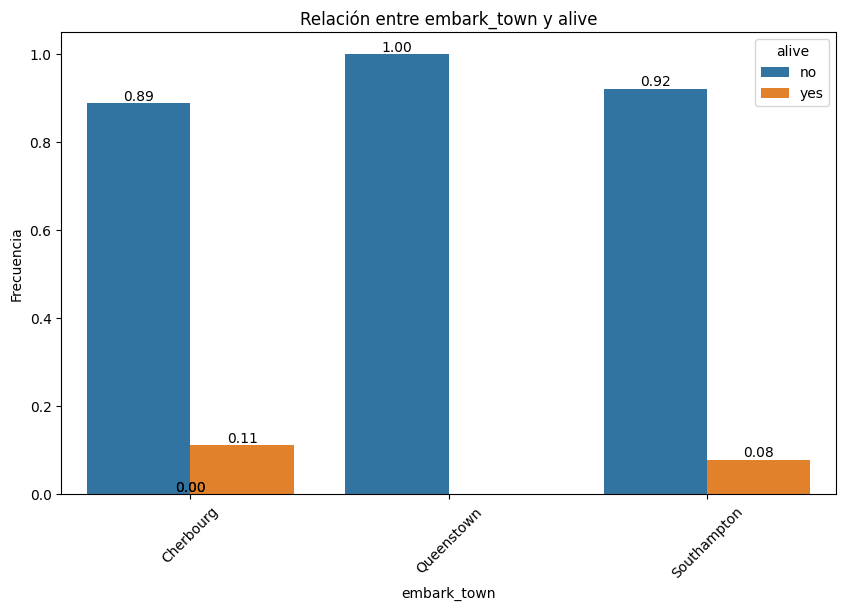

Valor Chi-Cuadrado: 0.20474749969131997
P-Value: 0.9026921075770808
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[8.27272727e+00 9.19191919e-01 8.18080808e+01]
 [7.27272727e-01 8.08080808e-02 7.19191919e+00]]


In [29]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Tampoco se ve esa relación significativa entre supervivencia y puerto de embarque*

*Probamos con hombre y tercera clase*

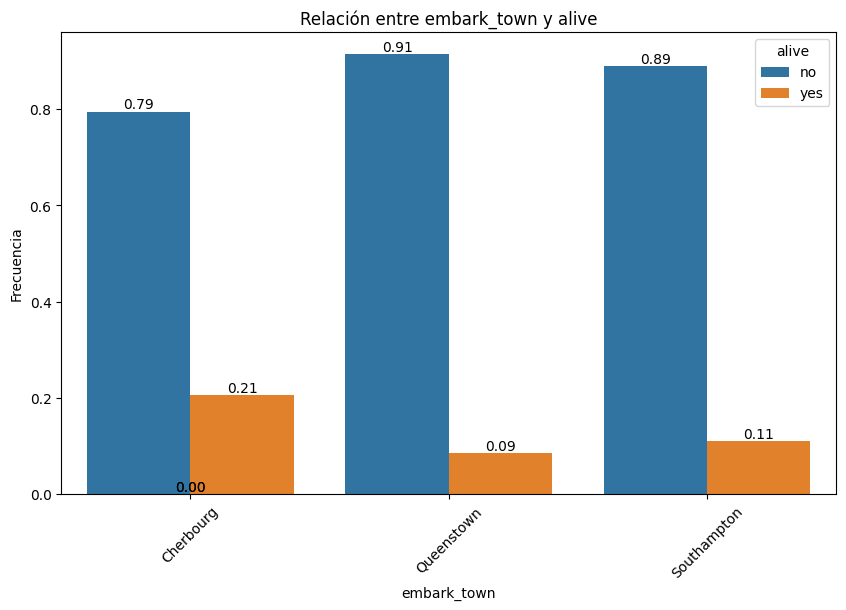

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [30]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Aunque hay variaciones porcentuales entre Cherbourg y el resto de lugares de embarque no podemos decir que sean estadísticamente extrapolables con confianza estadística. Es decir tampoco podemos suponer una relación ente sobrevivir y el puerto de embarque en estas condiciones (hombres pasajeros de tecera), pero sí que podríamos pensar que quizás merezca estudiar un poco más la posible relación. Veamos que ocurre para el resto de agrupaciones...*

*Niños embarcados en primera clase*

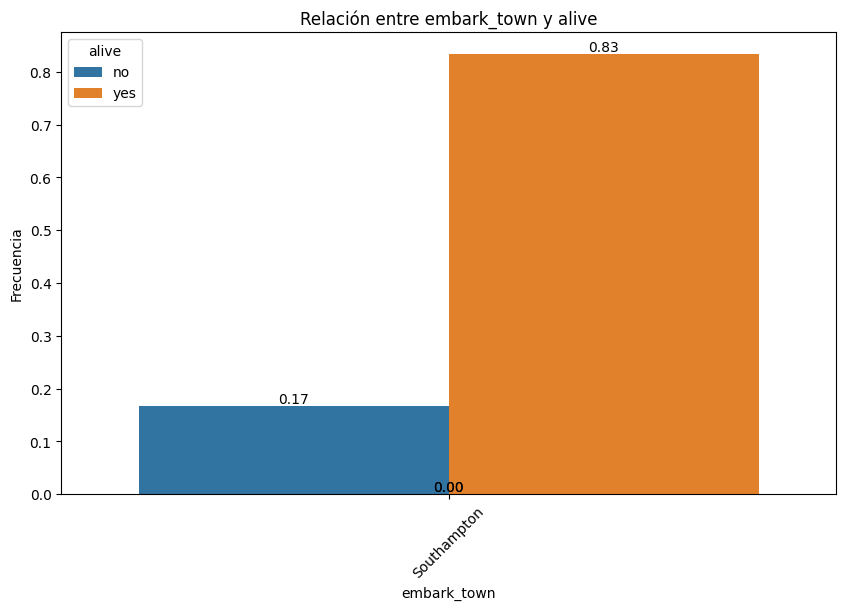

embark_town  Southampton
alive                   
no                     1
yes                    5
Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[1.]
 [5.]]


In [31]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

print(tabla_contingencia)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Solo embarcaron niños (6) en primera en Southampton y además muy pocos para tener un valor estadístico extrapolable, con lo que no podemos decir nada sobre la dependencia de este grupo respecto al puerto.*

*Niños en Segunda clase*

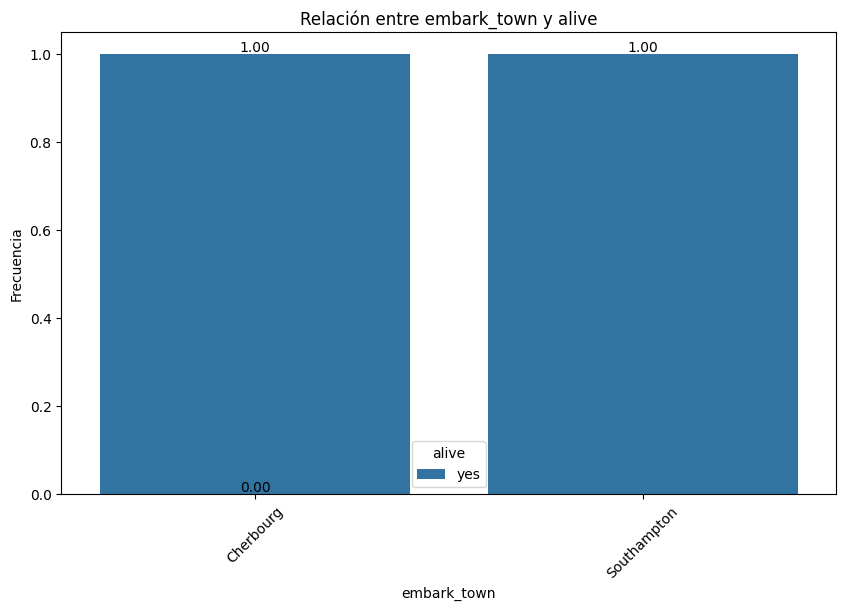

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[ 3. 16.]]


In [32]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Sobrevivieron todos los niños que embarcaron en segunda independientemente de donde embarcaron, es cierto que la muestra es pequeña, pero de primeras refuerza la hipótesis de que no influyó el puerto de embarque para niños, ni para hombres. Terminemos de comprobarlo para niños y tercera clase*

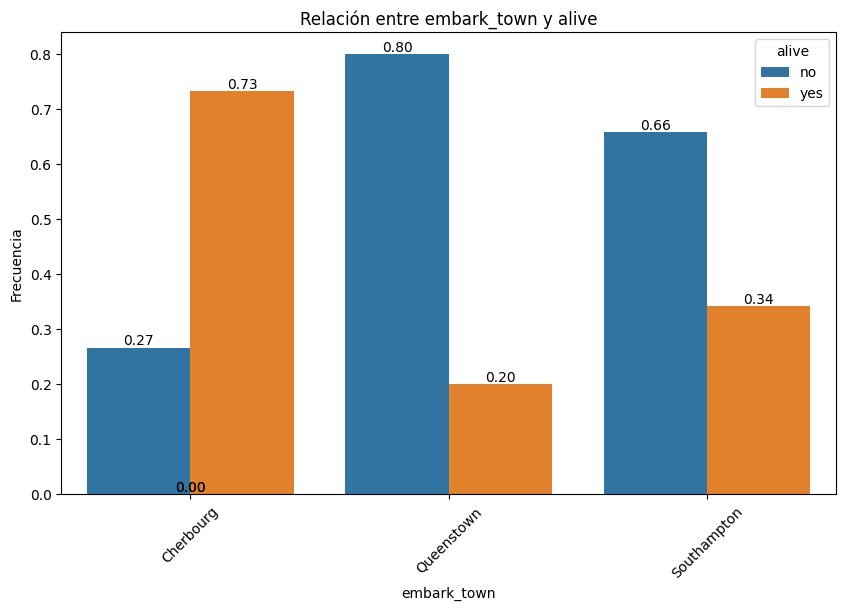

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [33]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Pues aquí si hay depedencia, aunque de nuevo sean valores absolutos bajos, si añadimos nuestras sospechas de ver hombres y tercera, parece que sí hay una relación combinada entre la tercera clase y el puerto. Es decir por ahora la tercera clase que subía en Chersbourhg parece tener un porcentaje más alto de supervivencia que en el resto de puertos. Terminemos de comprobar esta hipótesis o de reforzarla o refutarla investigando que ocurrió con las mujeres*

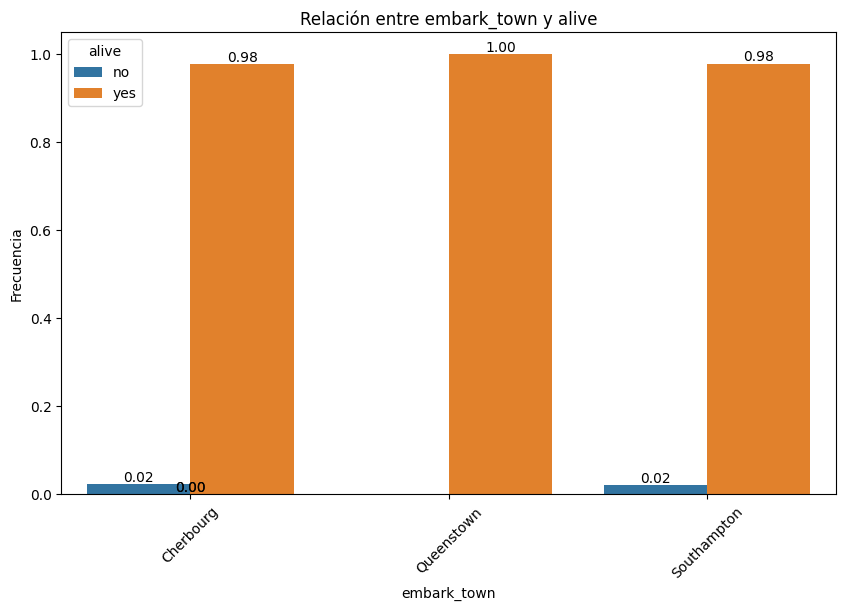

Valor Chi-Cuadrado: 0.02681395904797383
P-Value: 0.9866824937243175
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[9.45054945e-01 2.19780220e-02 1.03296703e+00]
 [4.20549451e+01 9.78021978e-01 4.59670330e+01]]


In [34]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Las mujeres que viajaban en primera independientemente del puerto se salvaron casi todas. No hay depedencia aquí con el puerto*

*Para mujeres y segunda...*

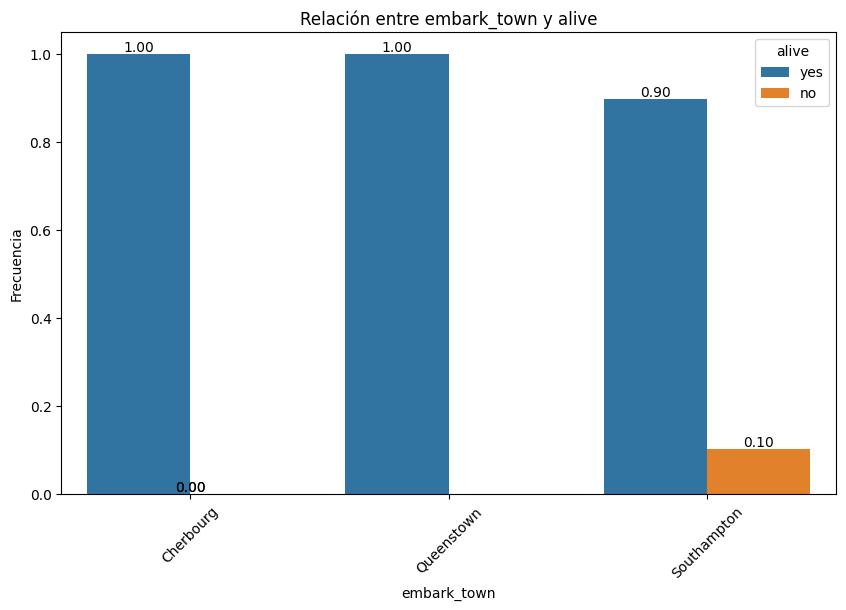

Valor Chi-Cuadrado: 0.7830508474576271
P-Value: 0.6760248632034247
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 0.45454545  0.18181818  5.36363636]
 [ 4.54545455  1.81818182 53.63636364]]


In [35]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Tampoco se puede decir que haya una relación significativa y extrapolable entre la supervivencia de las mujeres en segunda clase y el puerto de embarque... Lo curioso puede venir ahora cuando investiguemos mujeres y tercera clase*

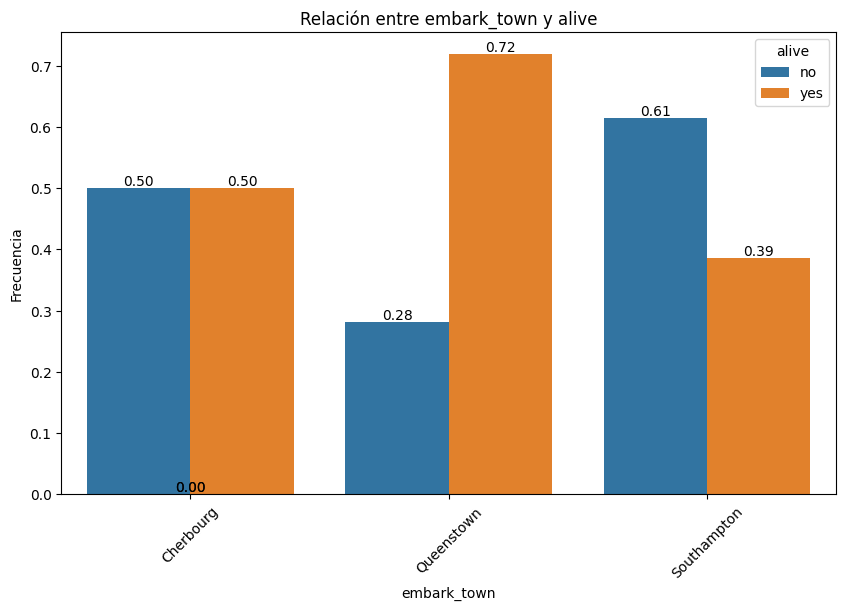

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [36]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Y aquí se ve otra dependecia estadística significativa entre el puerto de embarque y la supervivencia, las mujeres que subieron en Southampton en tercera lo tuvieron peor que las que lo hicieron en Cherbourg y las que los hicieron en Queenstown (con las que tienen más diferencia)*

*Viendo estos resultados, **parece que si influye el puerto de embarque para los pasajeros de tercera**, más allá de la clase y el género, grupo de edad. Sería interesante entender mejor esta relación y es un punto más a profundizar, aunque ya no la haremos en esta práctica y se deja abierta para que lo acometas, si quieres, por tu cuenta.*


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


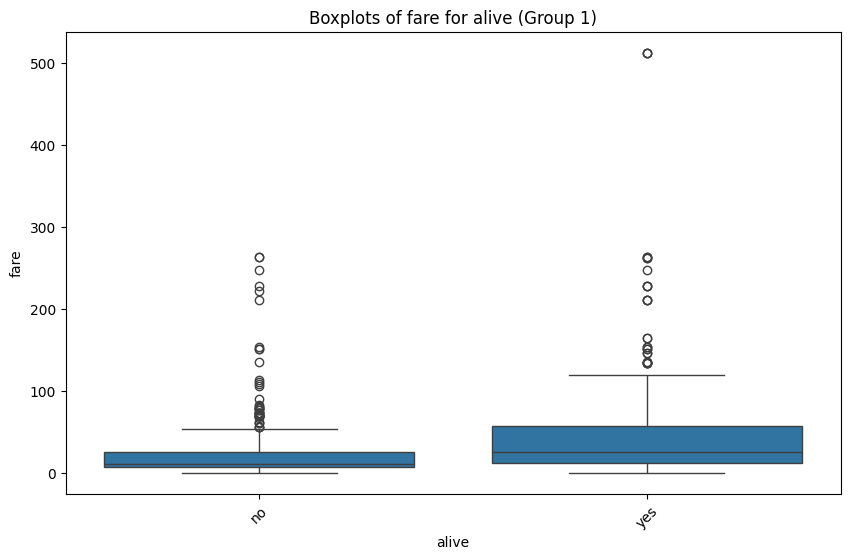

In [37]:
plot_grouped_boxplots(df_titanic,"alive","fare")

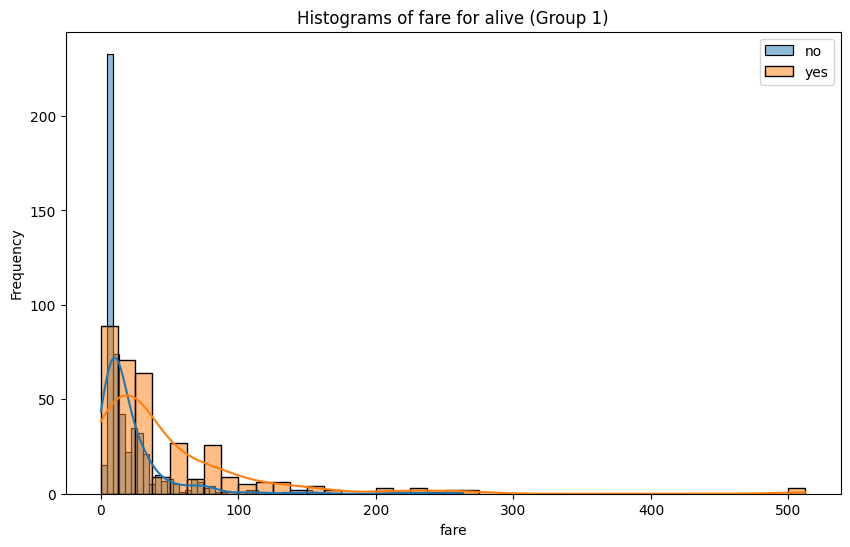

In [38]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

*Visualmente parece que si hay influencia, ver diagramas de cajas, y la relación entre bines, y por ese punto dominante en el NO, que seguramente esté relacionado con la clase*

*Hacemos la prueba U de Mann-Whitney*

In [39]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


*Con p-value <<<<< 0.05, podemos decir que existe confianza estadística en la relación entre ambas variables, aunque dicha relación probablemete venga de la relación entre precio y clase*

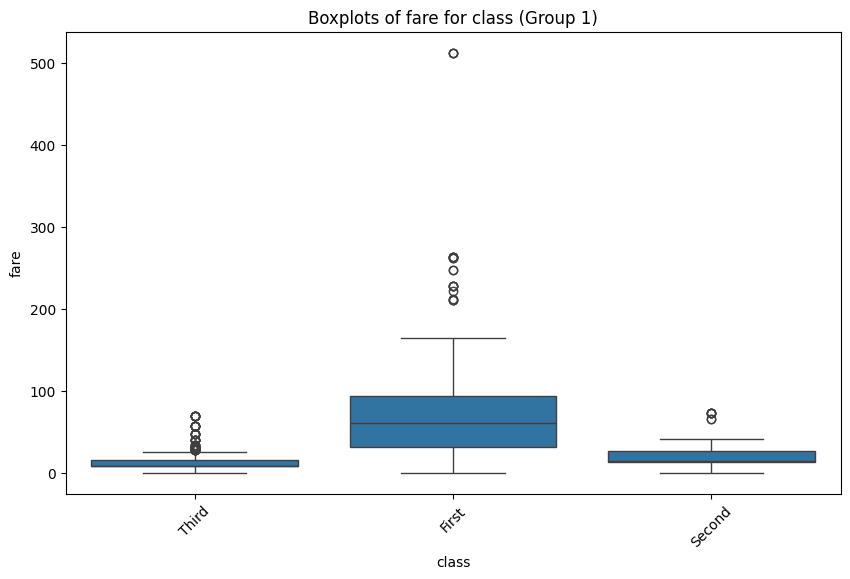

In [40]:
plot_grouped_boxplots(df_titanic,"class","fare")

In [41]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

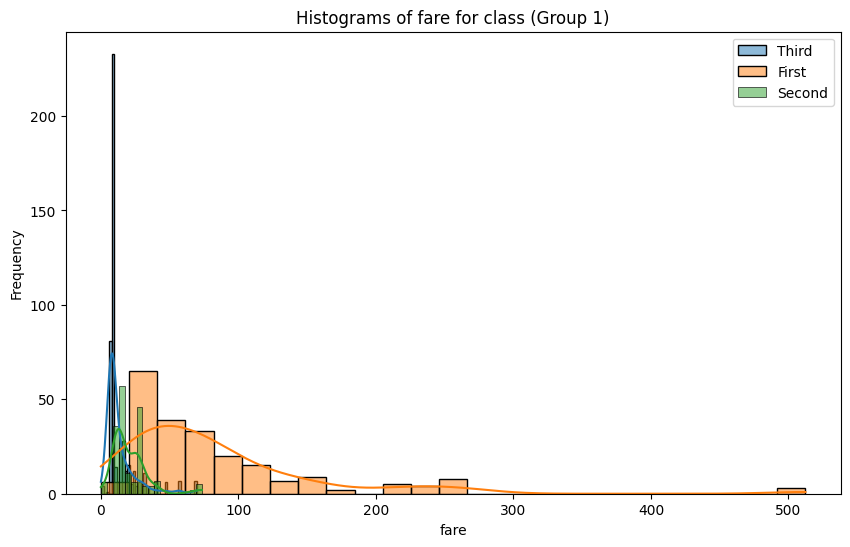

In [42]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

*El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare y comparar si además el precio independientemente de la clase es lo que hizo sobrevivir, es decir no era la clase sino el precio el que te daba mejor cabina*

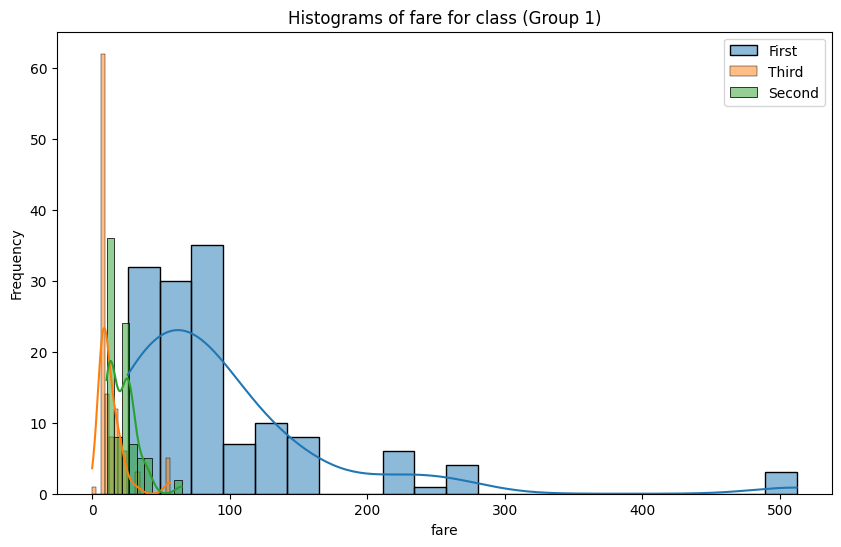

In [43]:
plot_grouped_histograms(df_alive,"class","fare", group_size = 3)

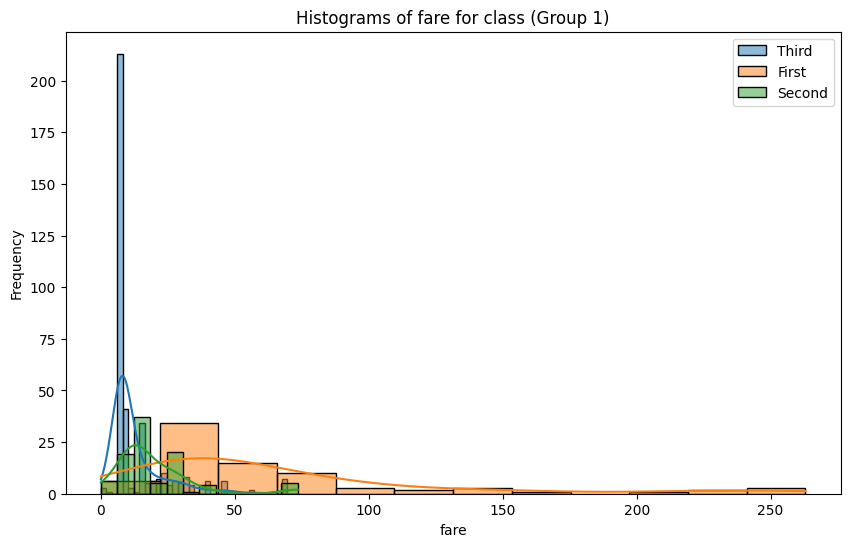

In [44]:
plot_grouped_histograms(df_dead,"class","fare", group_size = 3)


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [45]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


*Todos embarcaron en Southampton, todos hombres, de varias clases, edades de trabajar. Primera suposición: la tripulación.*

In [46]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


*No sólo era una persona, fueron tres pasajes, sólo una viajaba acompañada, sobrevieron los tres.*


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [47]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)

In [48]:
#Escojo una de las categoricas
# Me creo tantos datasets o dataframes como valores de la categorica escogida
# Para cada dataframe me hago un analisis bivariante ente la categorica que no había escogido y la numérica.
# Comparo los análisis bivariantes entre sí

Respuesta Southampton:


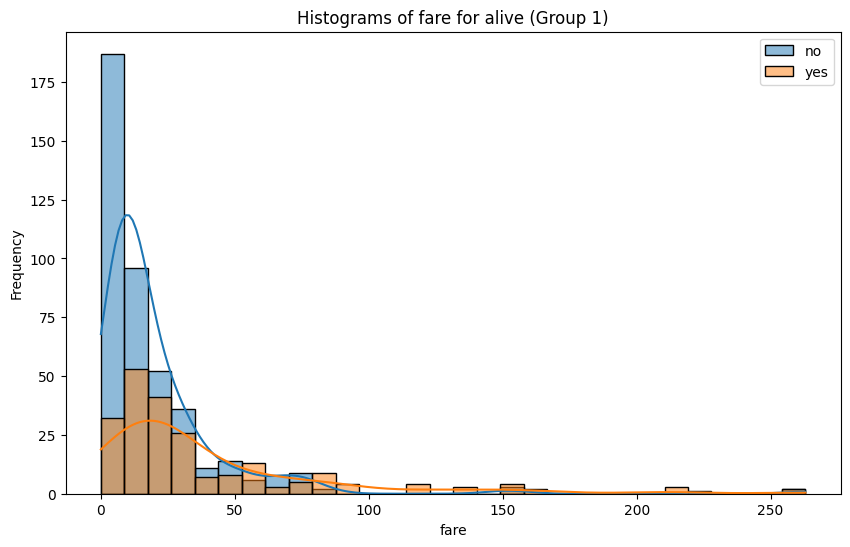

Respuesta Cherbourg:


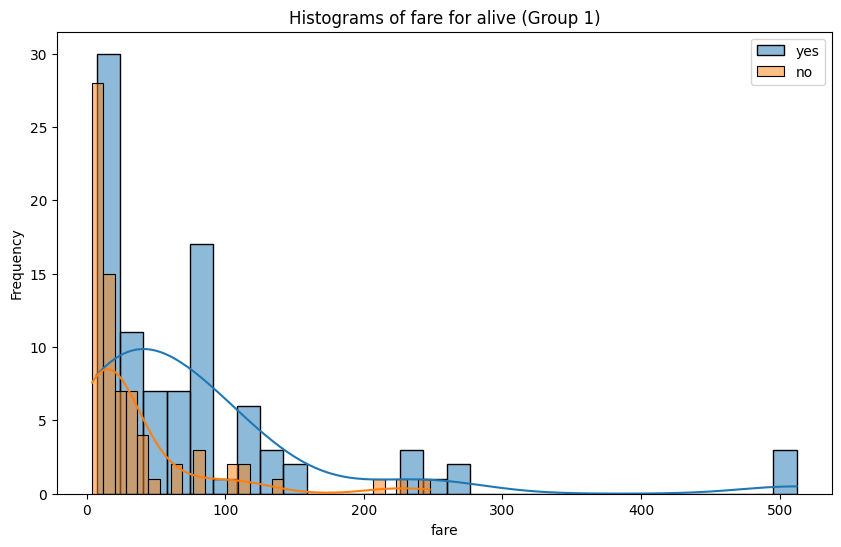

Respuesta Queenstown:


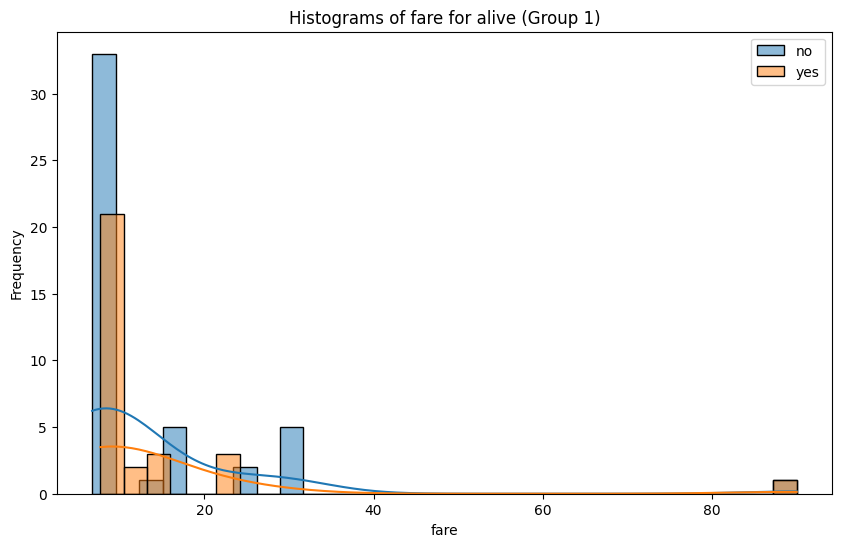

In [49]:
trivariant_analysis(df_titanic, "embark_town","alive","fare", 2, 30)


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


*Necesitamos hacer una agrupación de edad para poder contestar a la pregunta, para ello pintamos la distribución de la misma y elegimos como hacer el binning de esta*

(2,)


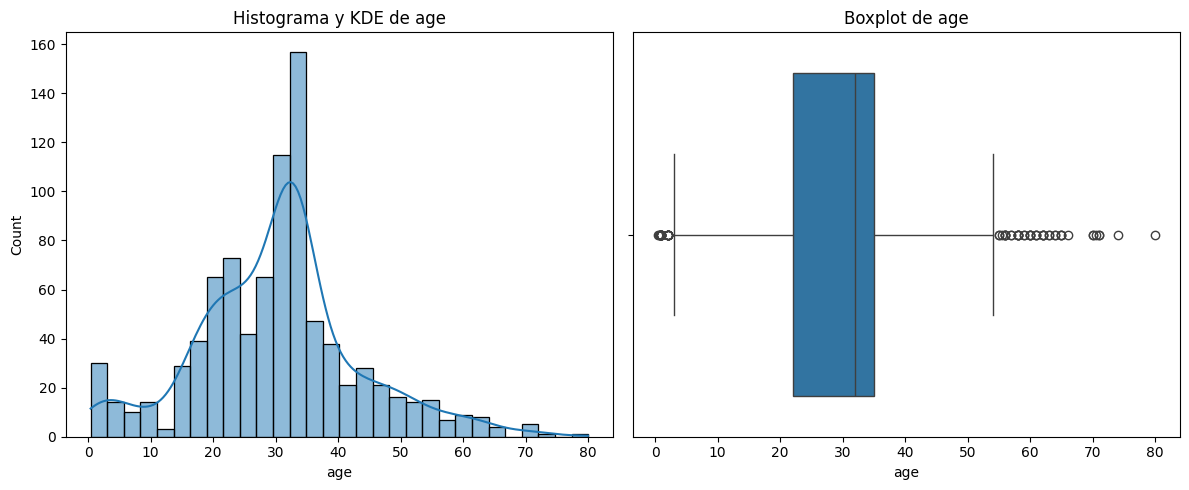

In [50]:
plot_combined_graphs(df_titanic,["age"])

In [51]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [52]:
# Escojo cuartiles como límites:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

Respuesta age_1:


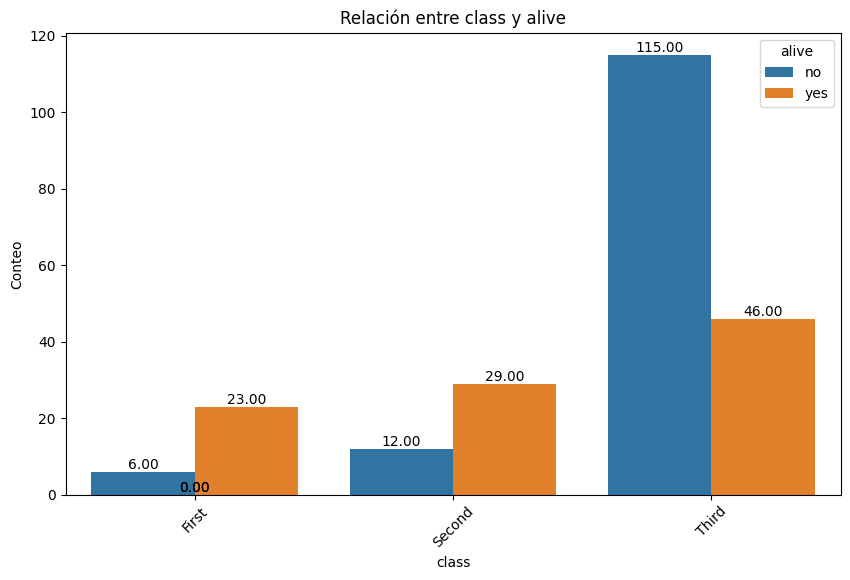

Respuesta age_4:


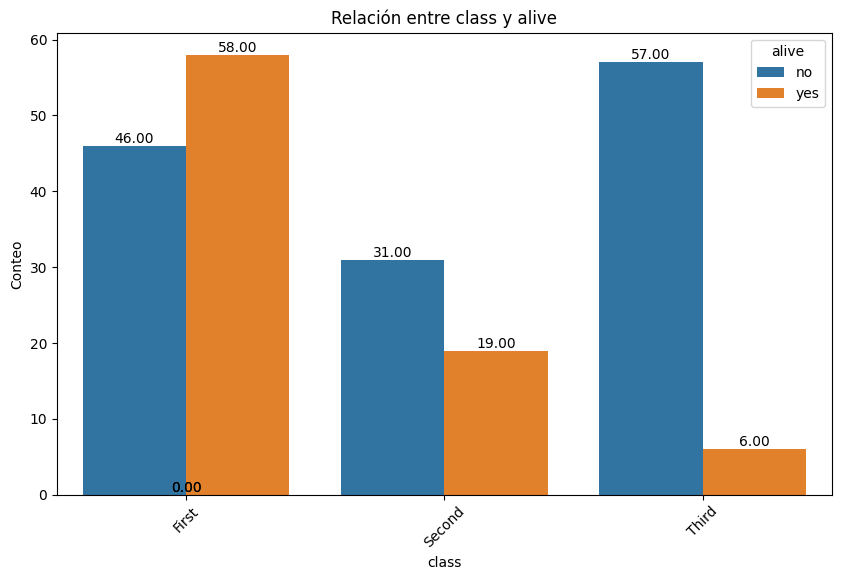

Respuesta age_2:


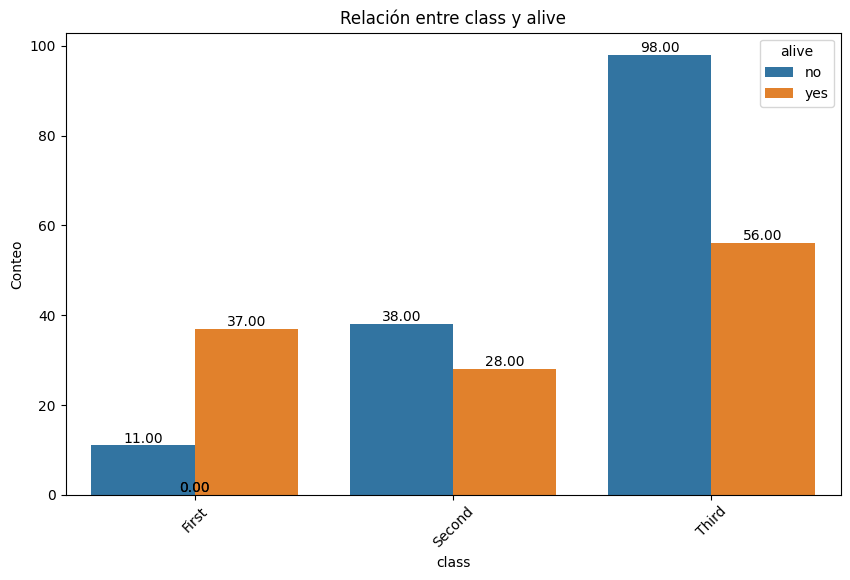

Respuesta age_3:


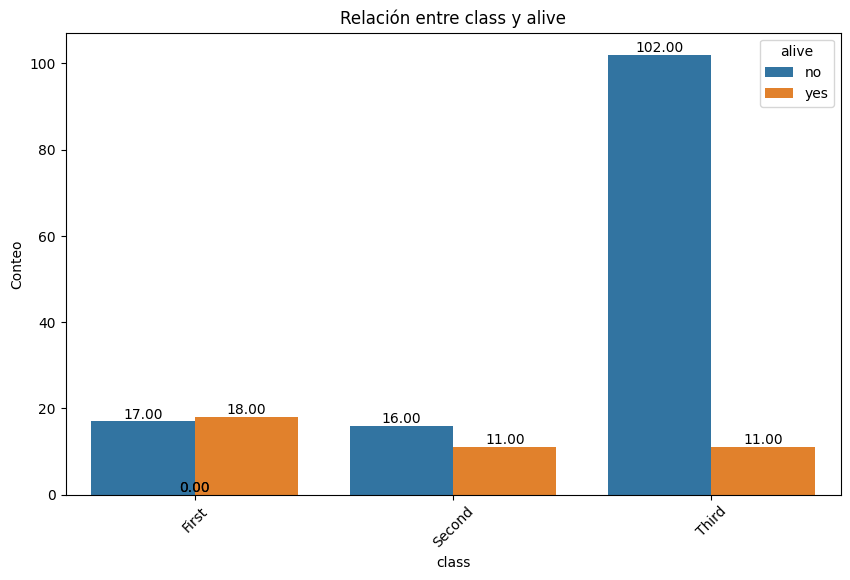

In [53]:
# Ahora hago el multivariante
tricategorical_analysis(df = df_titanic, directora = "cat_age", otras = ["alive","class"], muestra_valores = True)

*En términos relativos, la combinación cat_age1-Primera clase, es decir menores de 22 en primera clase es la que mayor ratio de supervivencia presenta, siendo los mayores de 35 (cat_age_3 y cat_age_4 conjuntamente) de tercera clase la que peor ratio de supervivencia tiene*

Respuesta age_1:


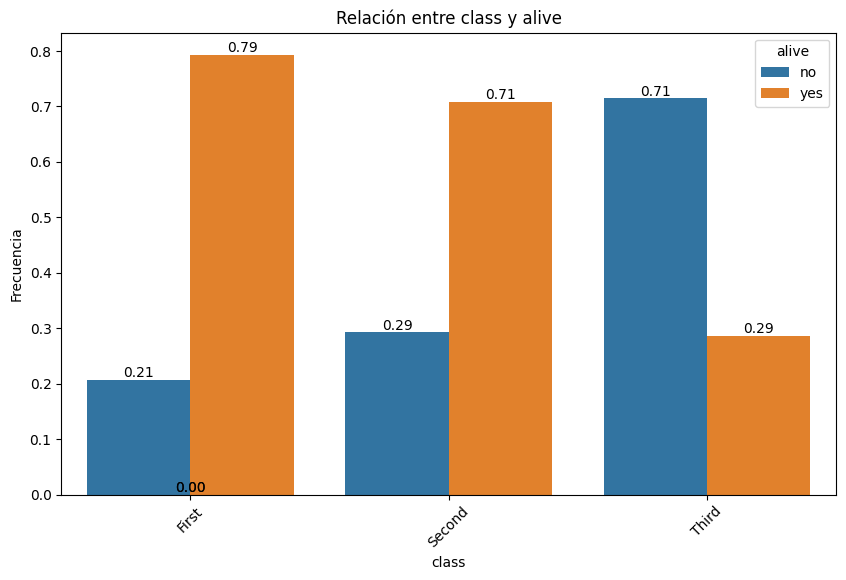

Respuesta age_4:


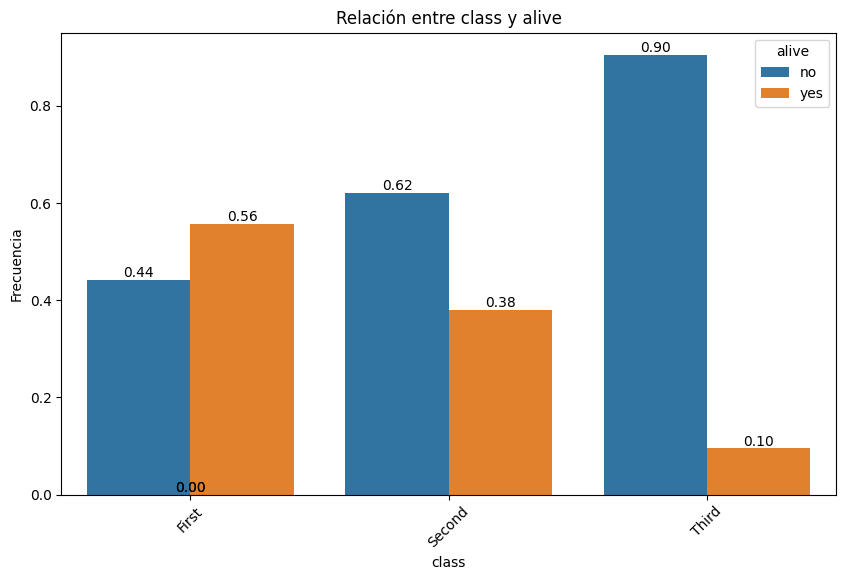

Respuesta age_2:


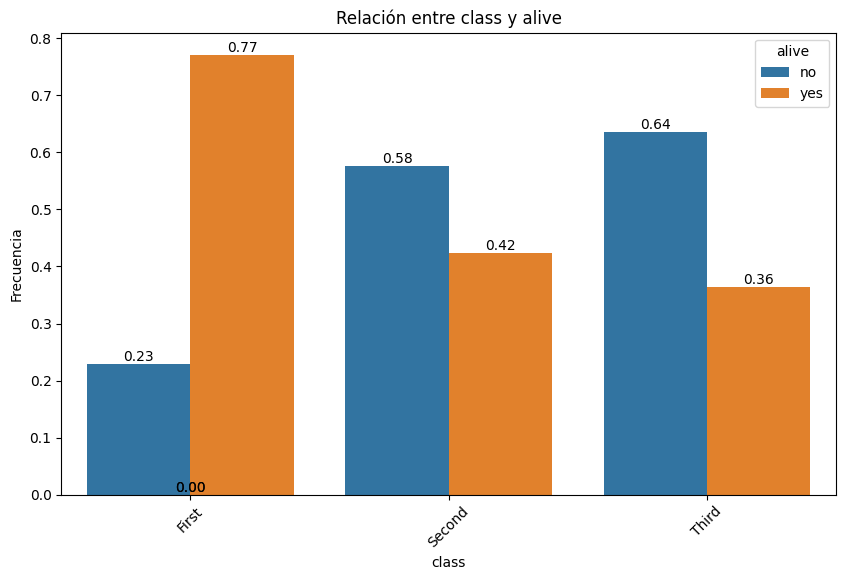

Respuesta age_3:


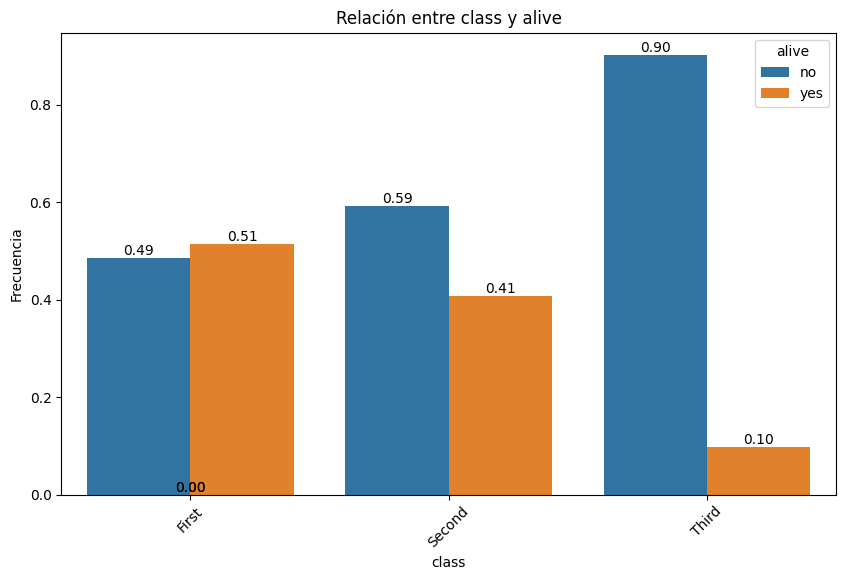

In [54]:
tricategorical_analysis(df = df_titanic, directora = "cat_age", otras = ["alive","class"], relativa= True, muestra_valores = True)

*En términos absolutos se salvaron más personas que viajaban en primera clase y eran mayores de 35 años, aunque con 56 supervivientes la combinación tercera clase y edades entre 22 y 32 años también estuvieron ahí. Por el otro lado perecieron más los menores de 22 años que viajaban en tercera y las personas entre 32 y 35 años que también viajaban en tercera*


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [55]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


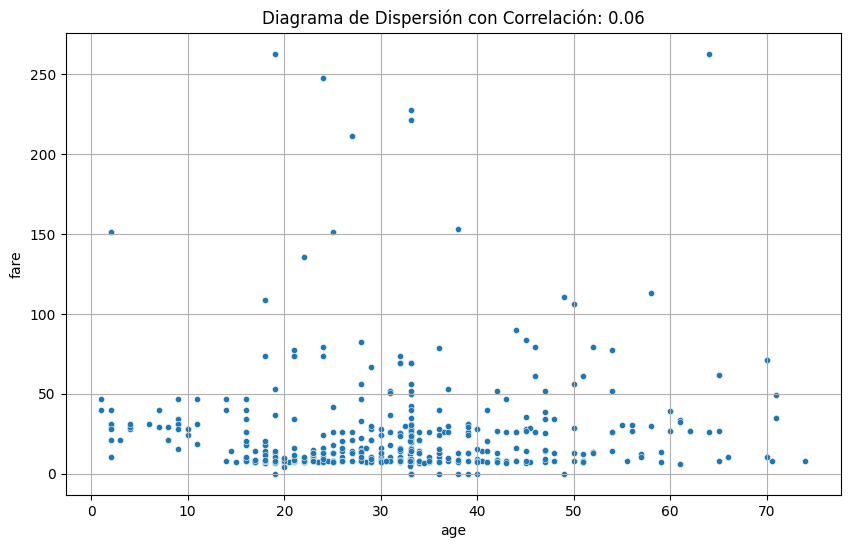

Respuesta yes:


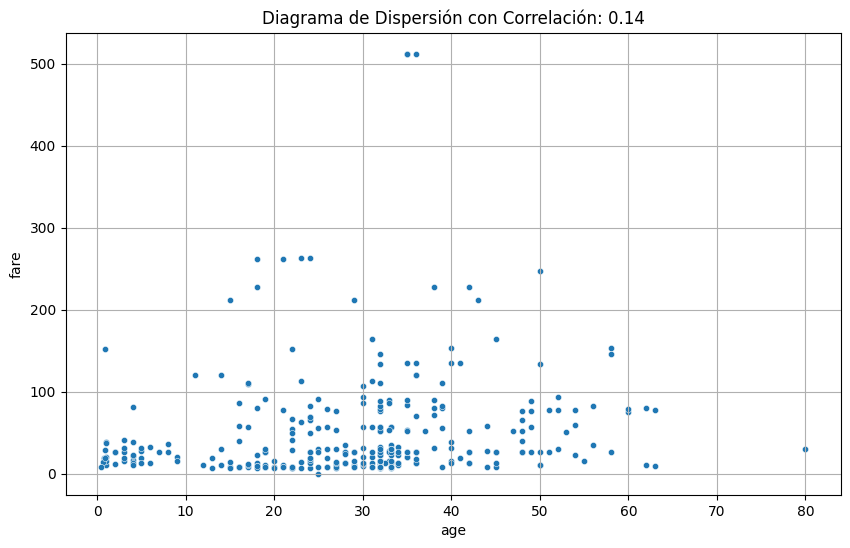

In [56]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

*No se ve una correlación entre edad y el precio del billete independientemente de si se salvaron o no*
*Esto no quiere decir que entre supervivencia y precio y superviviecia y edad no hay cierta relación (de hecho comparando las dos figuras se puede intuir que la edad media es menor entre los supervivientes que entre los fallecidos y el rango de precios de los supervivientes es mayor que el de los fallecidos), que estarían provocadas por la supervivencia superior en mujeres y niños, y en los pasajeros de primera y segunda clase (con precios medios mayores). Un chequeo rápido a las medias (aunque habría que hacer los test correspondientes)*

In [57]:
df_titanic.groupby("alive")[["age","fare"]].mean()

,age,fare
alive,,
no,31.169758,22.117887
yes,28.954503,48.395408


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [58]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")


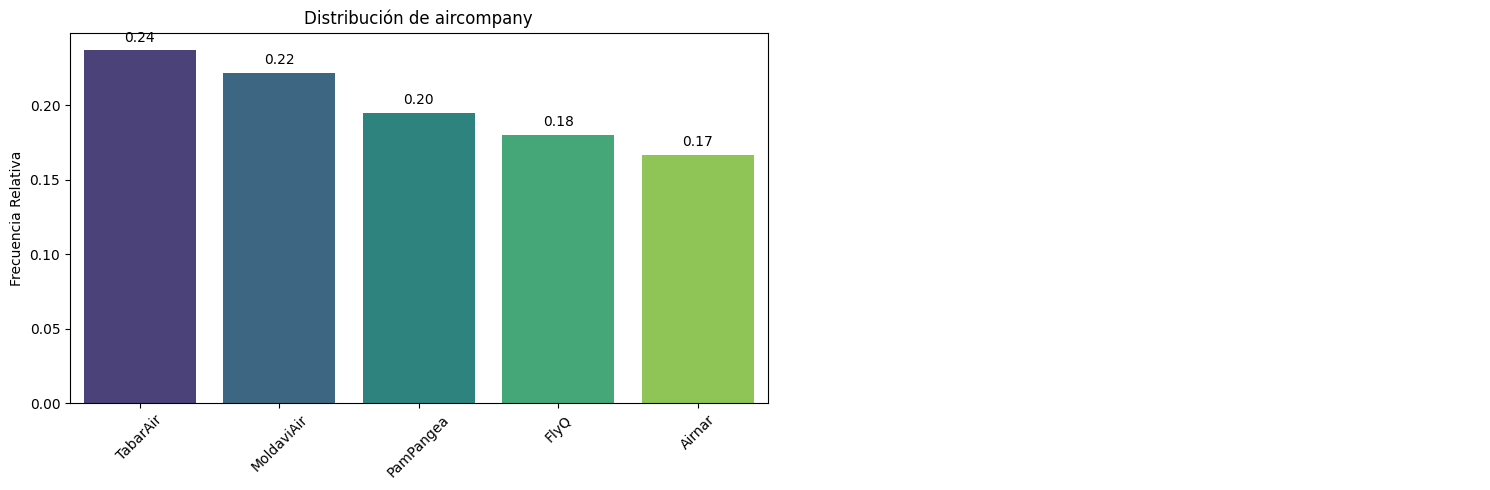

In [59]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


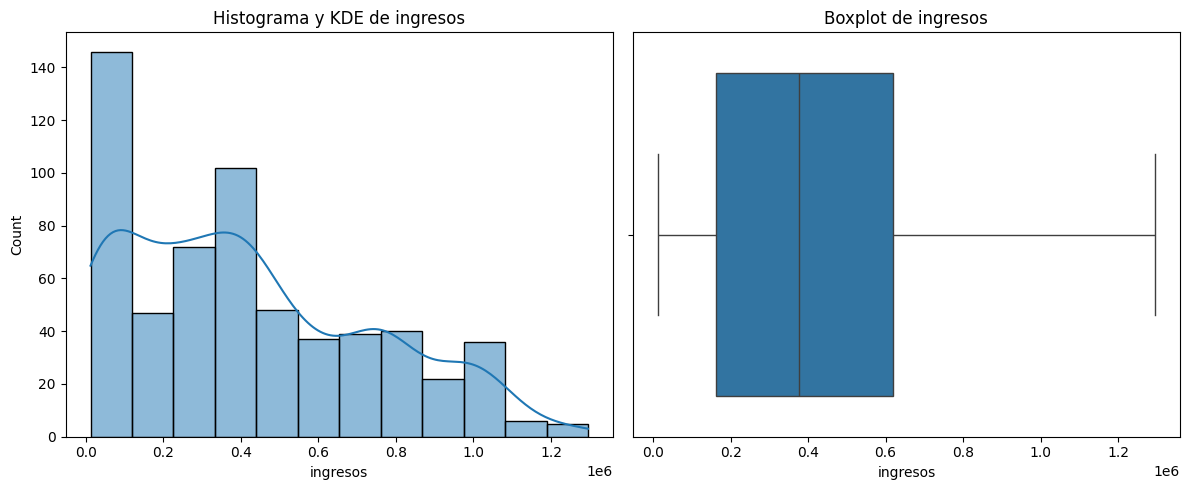

In [60]:
plot_combined_graphs(df_viajes,["ingresos"])

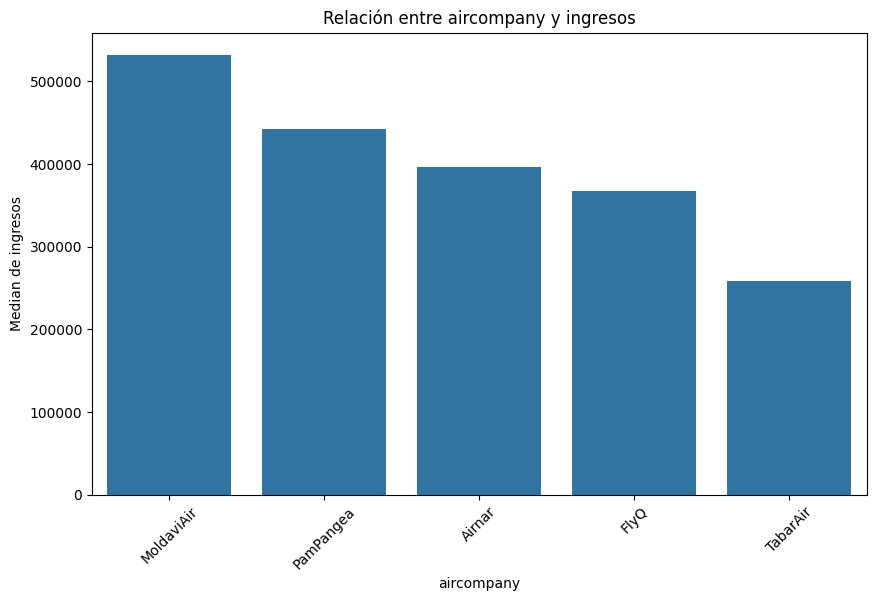

In [61]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median")

In [62]:
df_viajes.groupby("aircompany")["ingresos"].sum().sort_values()

aircompany
TabarAir      38487996.70
Airnar        40529397.82
FlyQ          43374852.87
PamPangea     55974794.70
MoldaviAir    72894268.81
Name: ingresos, dtype: float64

In [63]:
df_viajes.groupby("aircompany")["ingresos"].apply(lambda row: row.sum()/len(row))

aircompany
Airnar        405293.978200
FlyQ          401619.008056
MoldaviAir    548077.209098
PamPangea     478417.048718
TabarAir      271042.230282
Name: ingresos, dtype: float64

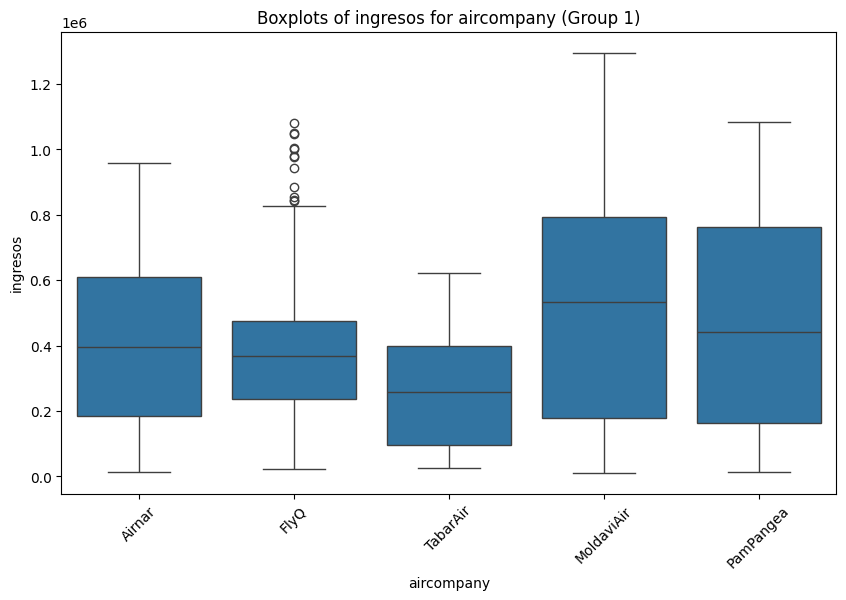

In [64]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

*Parece que nuestra compañía es con diferencia la que menos ingresa y la que más viajes hace, es decir, es la más ineficiente*

*Unos números también ayudan:*

In [65]:
df_viajes.groupby("aircompany").agg({"ingresos": sum, "destino": len})

,ingresos,destino
aircompany,,
Airnar,40529397.82,100
FlyQ,43374852.87,108
MoldaviAir,72894268.81,133
PamPangea,55974794.70,117
TabarAir,38487996.70,142


*Es la que menos ingresó en Junio y la que más vuelos realizo con cierta diferencia (casi un 10% más que el segundo)*

In [66]:
df = df_viajes.groupby("aircompany").agg({"ingresos": sum, "destino": len})
(df["ingresos"]/df["destino"]).sort_values(ascending= False)

aircompany
MoldaviAir    548077.209098
PamPangea     478417.048718
Airnar        405293.978200
FlyQ          401619.008056
TabarAir      271042.230282
dtype: float64

*Claramente, TabarAir es la empresa más ineficiente en términos de ingresos de todas ellas*

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

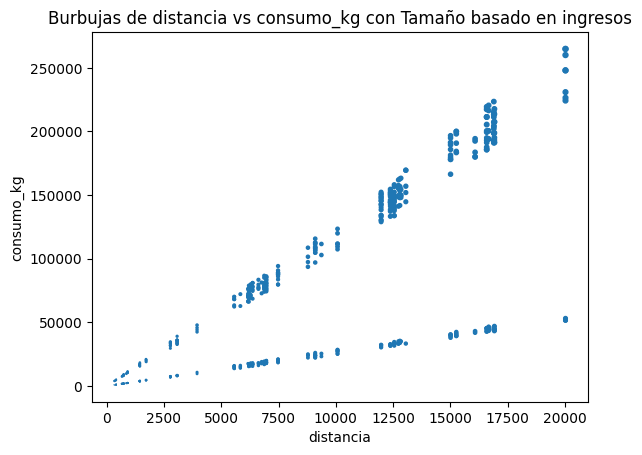

In [67]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

*Existen dos curvas de consumo con ingresos parecidos, es decir existe una "línea eficiente" de viajes, si encontramos sus características podríamos explotarlas para mejorar los resultados de Tabair, por ejemplo*

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


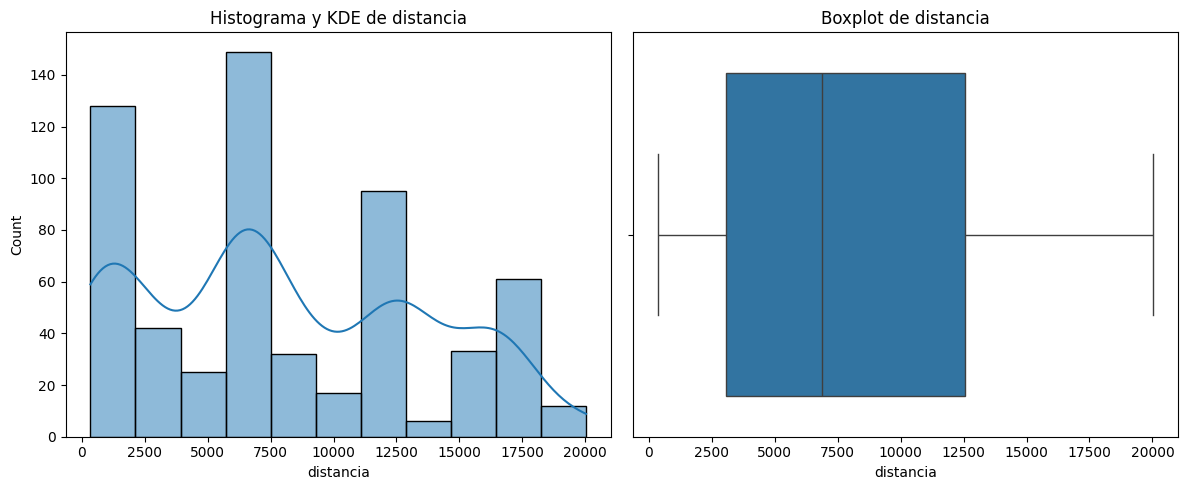

In [68]:
plot_combined_graphs(df_viajes,["distancia"])

In [69]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins = [0,5500, 11000,16000, df_viajes.distancia.max()], labels = ["cat1","cat2","cat3","cat4"])

In [70]:
df_viajes.cat_vuelo.value_counts()

cat_vuelo
cat2    217
cat1    176
cat3    127
cat4     80
Name: count, dtype: int64

In [71]:
pd.crosstab(df_viajes["aircompany"],df_viajes["cat_vuelo"])

cat_vuelo,cat1,cat2,cat3,cat4
aircompany,,,,
Airnar,31,37,32,0
FlyQ,24,50,25,9
MoldaviAir,34,19,51,29
PamPangea,33,23,19,42
TabarAir,54,88,0,0


In [72]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_viajes[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta cat1:


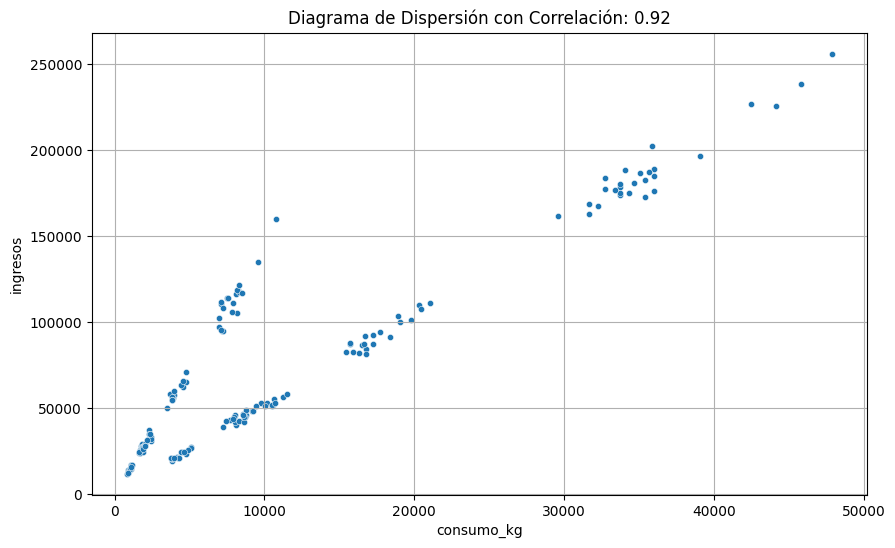

Respuesta cat3:


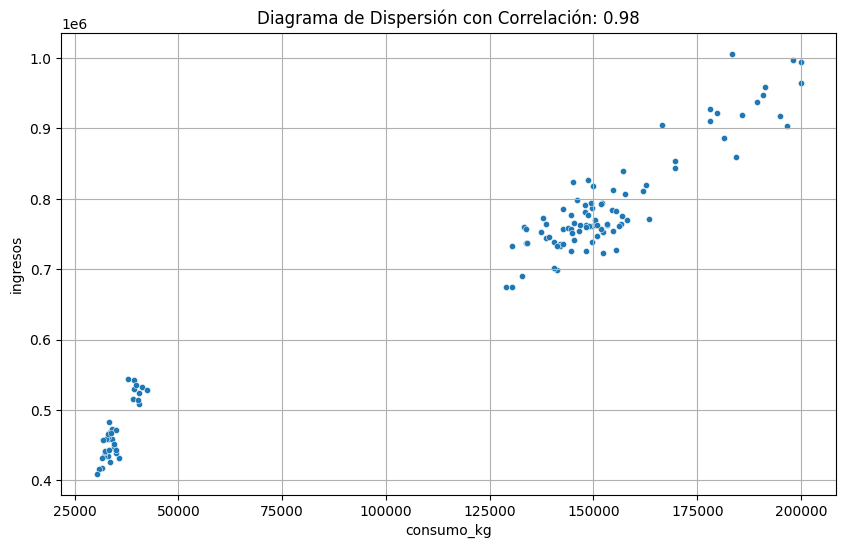

Respuesta cat2:


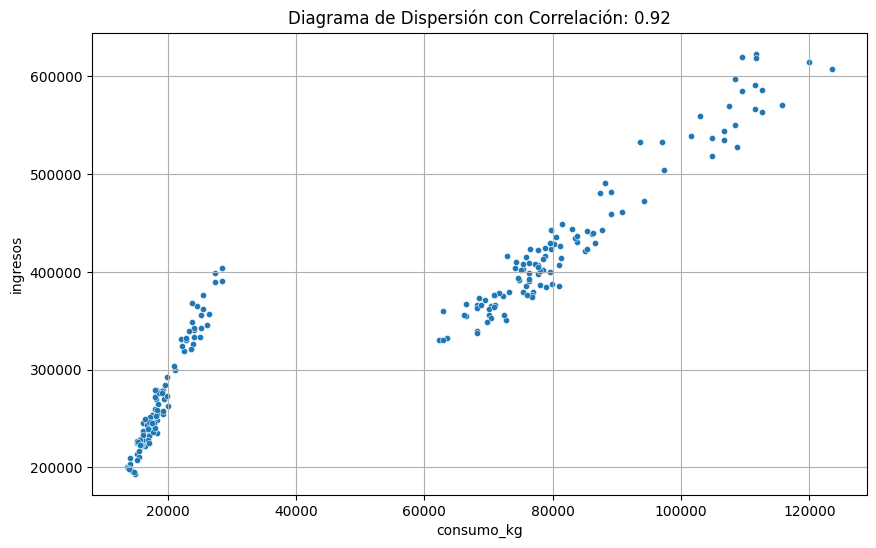

Respuesta cat4:


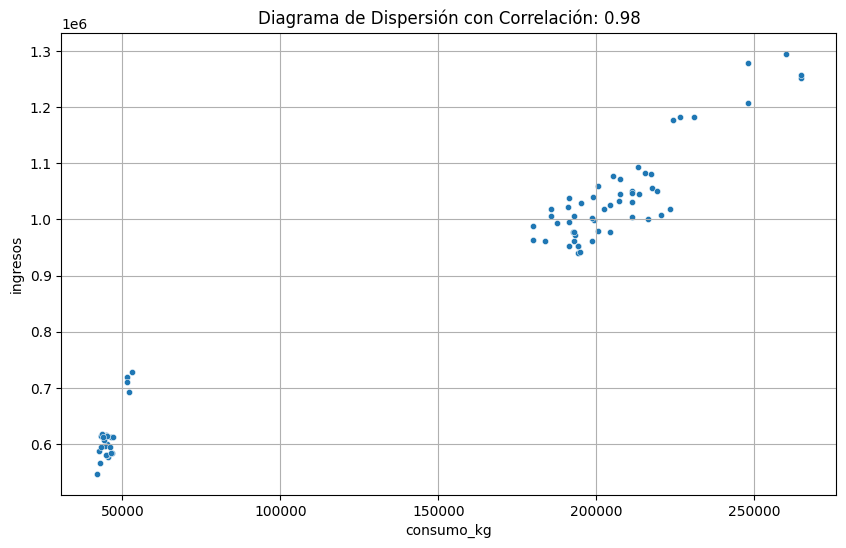

In [73]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

*Visualmente la cat2 parece más interesante (pendientes más empinadas) pero habría que comprobarlo numéricamente, y en todas las categorias se repite la situación con dos zonas diferenciadas, menos claramente en la primera*



*Pero lo realmente llamativo es que TabarAir no vuela en Cat3 y Cat4. Analizando los ingresos medios por categoría:*

In [74]:
df_viajes.groupby("cat_vuelo")["ingresos"].mean()

cat_vuelo
cat1     74065.190455
cat2    355344.844194
cat3    699097.234094
cat4    904133.218250
Name: ingresos, dtype: float64

*Claramente, TabarAir no vuela en las categorías de mayores ingresos y eso sería un posible punto de expansión*


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [75]:
df_viajes["ingreso_kg"] = df_viajes["ingresos"]/df_viajes["consumo_kg"]
df_viajes["consumo_km"] = df_viajes["consumo_kg"]/df_viajes["distancia"]

In [76]:
df_viajes.describe()

,distancia,consumo_kg,duracion,ingresos,ingreso_kg,consumo_km
count,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,8071.003333,68240.520508,635.873333,4.187689e+05,8.904848,7.934756
std,5550.244086,67441.849592,450.474786,3.182858e+05,4.407691,4.537013
min,344.000000,835.920000,42.000000,1.179785e+04,4.554666,2.430000
25%,3073.000000,15733.520400,224.000000,1.627668e+05,5.131672,2.660600
50%,6877.000000,36033.998000,542.000000,3.754817e+05,5.459427,11.086400
75%,12553.000000,111717.652800,876.000000,6.188420e+05,13.855693,11.906800
max,20029.000000,264876.314560,1721.000000,1.295516e+06,16.213469,13.224640


(2, 2)


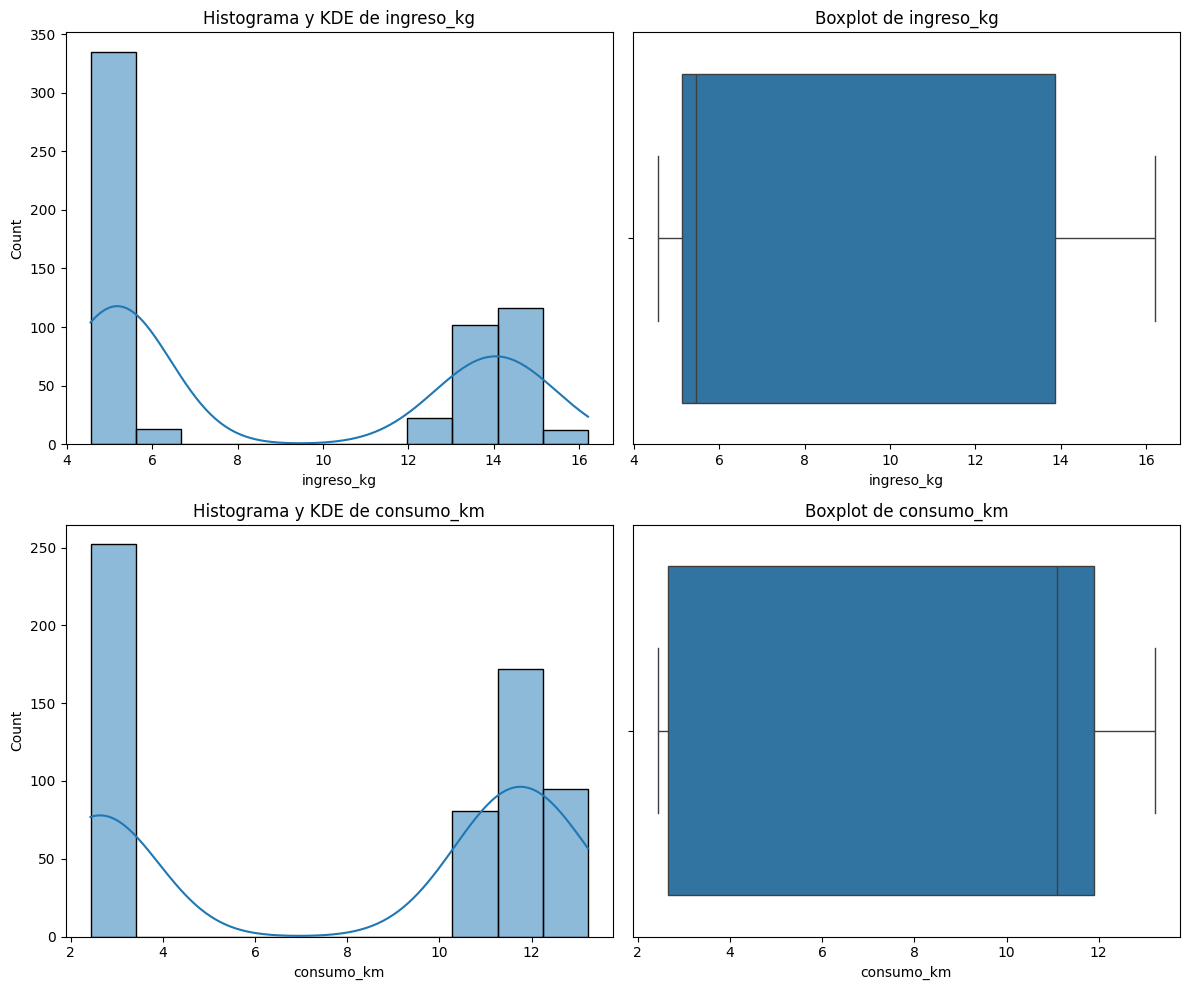

In [77]:
plot_combined_graphs(df_viajes,["ingreso_kg","consumo_km"])

In [78]:
df_viajes["eficiente_ingreso"] = df_viajes.ingreso_kg >= 12
df_viajes["eficiente_consumo"] = df_viajes.consumo_km <= 4
df_viajes["supereficiente"] = (df_viajes["eficiente_ingreso"]) & (df_viajes["eficiente_consumo"])

In [79]:
df_viajes.groupby("eficiente_ingreso")["eficiente_consumo"].mean()

eficiente_ingreso
False    0.0
True     1.0
Name: eficiente_consumo, dtype: float64

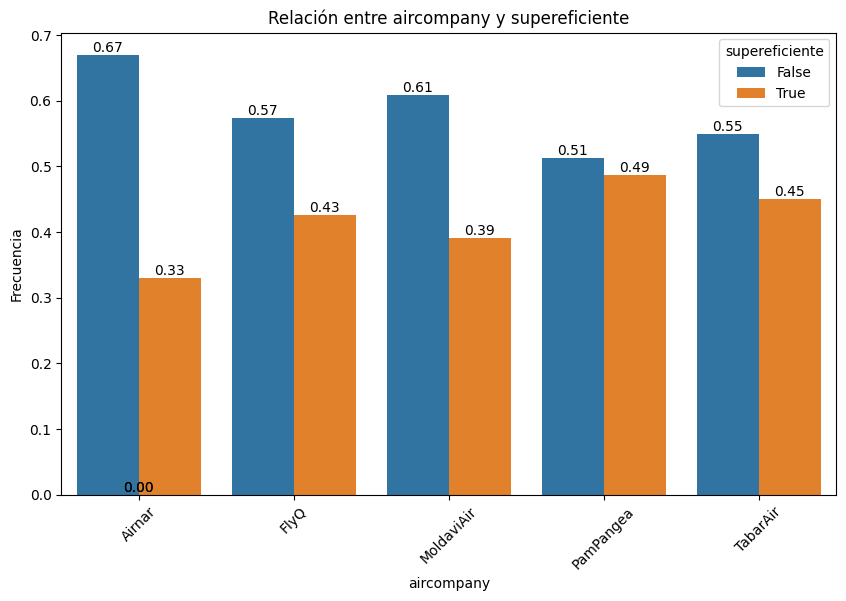

In [80]:
plot_categorical_relationship_fin(df_viajes, "aircompany", "supereficiente", relative_freq = True, show_values = True)

In [81]:
df_viajes.groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum})

,ingresos,destino,consumo_kg,distancia
aircompany,,,,
Airnar,40529397.82,100,6.731762e+06,759821
FlyQ,43374852.87,108,7.186780e+06,826289
MoldaviAir,72894268.81,133,1.232397e+07,1386026
PamPangea,55974794.70,117,8.951536e+06,1106492
TabarAir,38487996.70,142,5.750263e+06,763974


*Este es un hallazgo importante, TabarAir tiene los vuelos más eficientes en ingresos por kilometro y en consumo, pero es básicamente la que menos cobra por ellos*

*Una posible acción es subir los precios de los vuelos, la otra es aprovechar esa capacidad de consumo e ingresos y aumentar los vuelos o hacer vuelos más largos, entrando en las categorías de vuelos con más ingresos, siempre intentando mantener el nivel de eficiencia de consumo.*

In [82]:
df_viajes.loc[df_viajes.supereficiente].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum})

,ingresos,destino,consumo_kg,distancia
aircompany,,,,
Airnar,8721813.75,33,6.297195e+05,238838
FlyQ,10547305.45,46,7.545022e+05,285035
MoldaviAir,16374674.69,52,1.215658e+06,459579
PamPangea,16723934.00,57,1.225525e+06,463329
TabarAir,13351546.24,64,9.415297e+05,352937


In [83]:
df_viajes.loc[df_viajes.supereficiente == False].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum})

,ingresos,destino,consumo_kg,distancia
aircompany,,,,
Airnar,31807584.07,67,6.102042e+06,520983
FlyQ,32827547.42,62,6.432278e+06,541254
MoldaviAir,56519594.12,81,1.110831e+07,926447
PamPangea,39250860.70,60,7.726011e+06,643163
TabarAir,25136450.46,78,4.808733e+06,411037
